In [1366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

file_name = f"covid_19_recent_data.csv"
df = pd.read_csv(file_name, encoding="utf-8")

In [1367]:
df.tail()

,Number,Patient,Confirmed Date,Area,Travel History,Transmission Route,Status
41715,30005,95804,2021-03-14,Songpa-gu,-,Known,Recovered
41716,30004,95889,2021-03-14,Jongno-gu,-,Under Inspection,Recovered
41717,30003,95799,2021-03-14,Jung-gu,-,Known,Recovered
41718,30002,95872,2021-03-14,Jongno-gu,-,Known,Recovered
41719,30001,95806,2021-03-14,Songpa-gu,-,Known,Recovered


# 1. COVID-19 Analysis by 'Date'

In [1368]:
# frequency of comfirmed date
df["Confirmed Date"].value_counts()

2021-08-10    660
2021-07-13    637
2021-07-20    604
2021-07-06    583
2021-07-27    573
             ... 
2021-03-21    109
2021-03-28    107
2021-03-22     97
2021-03-15     79
2021-03-14     55
Name: Confirmed Date, Length: 155, dtype: int64

In [1369]:
# conversion to datetime
df["Confirmed Date"] = pd.to_datetime(df["Confirmed Date"])

In [1370]:
# sample by month
df["Month"] = df["Confirmed Date"].dt.month
df["Month"]

0        8
1        8
2        8
3        8
4        8
        ..
41715    3
41716    3
41717    3
41718    3
41719    3
Name: Month, Length: 41720, dtype: int64

In [1371]:
df['Week'] = df["Confirmed Date"].dt.week
df[['Confirmed Date','Month','Week']].head()

<ipython-input-1371-a367d3f15dc5>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] = df["Confirmed Date"].dt.week


,Confirmed Date,Month,Week
0,2021-08-15,8,32
1,2021-08-15,8,32
2,2021-08-15,8,32
3,2021-08-15,8,32
4,2021-08-15,8,32


## Line Graph Analysis

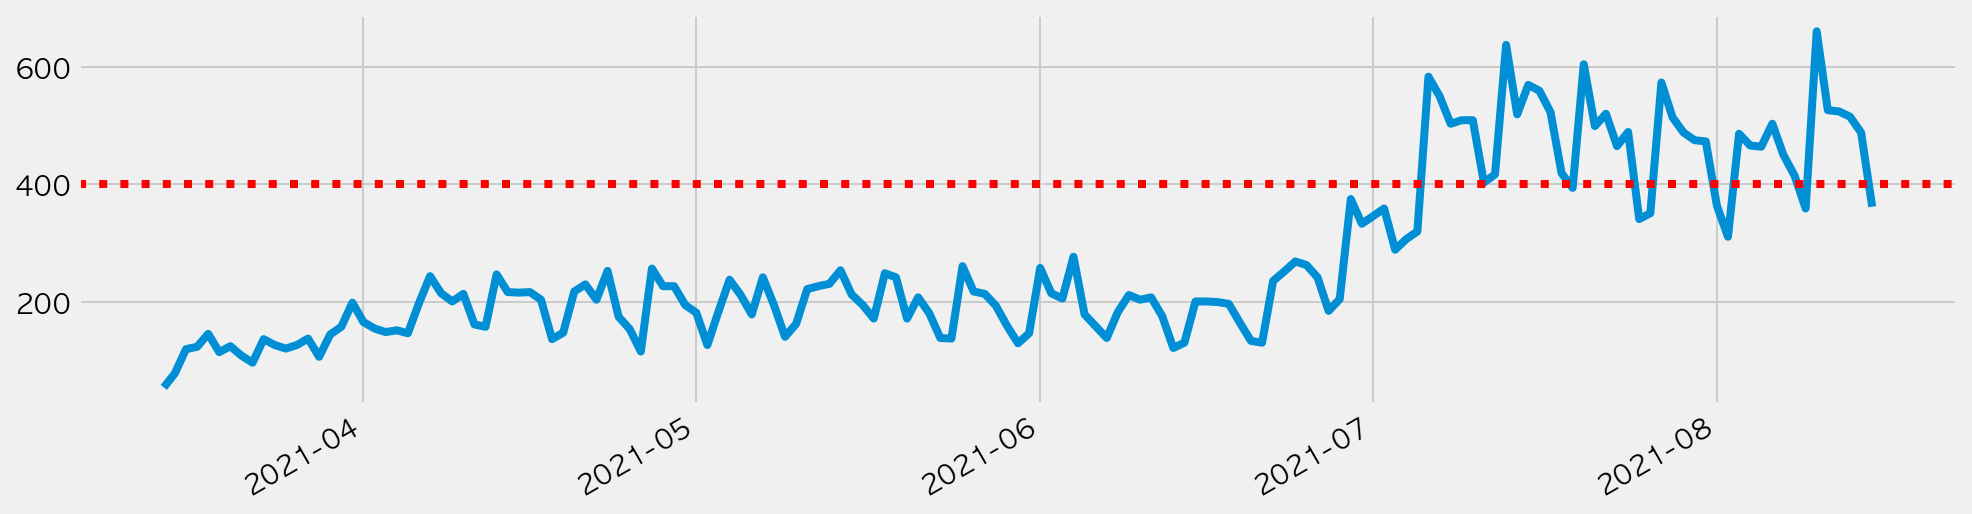

In [1372]:
# line graph by comfirmed date
df["Confirmed Date"].value_counts().plot(figsize=(15,4))
plt.axhline(400, color="red", linestyle=":")

## Value Expression on the Graph

In [1373]:
df['Date'] = df["Confirmed Date"].astype(str).map(lambda x : x[-5:])
day_counts = df['Date'].value_counts().sort_index()

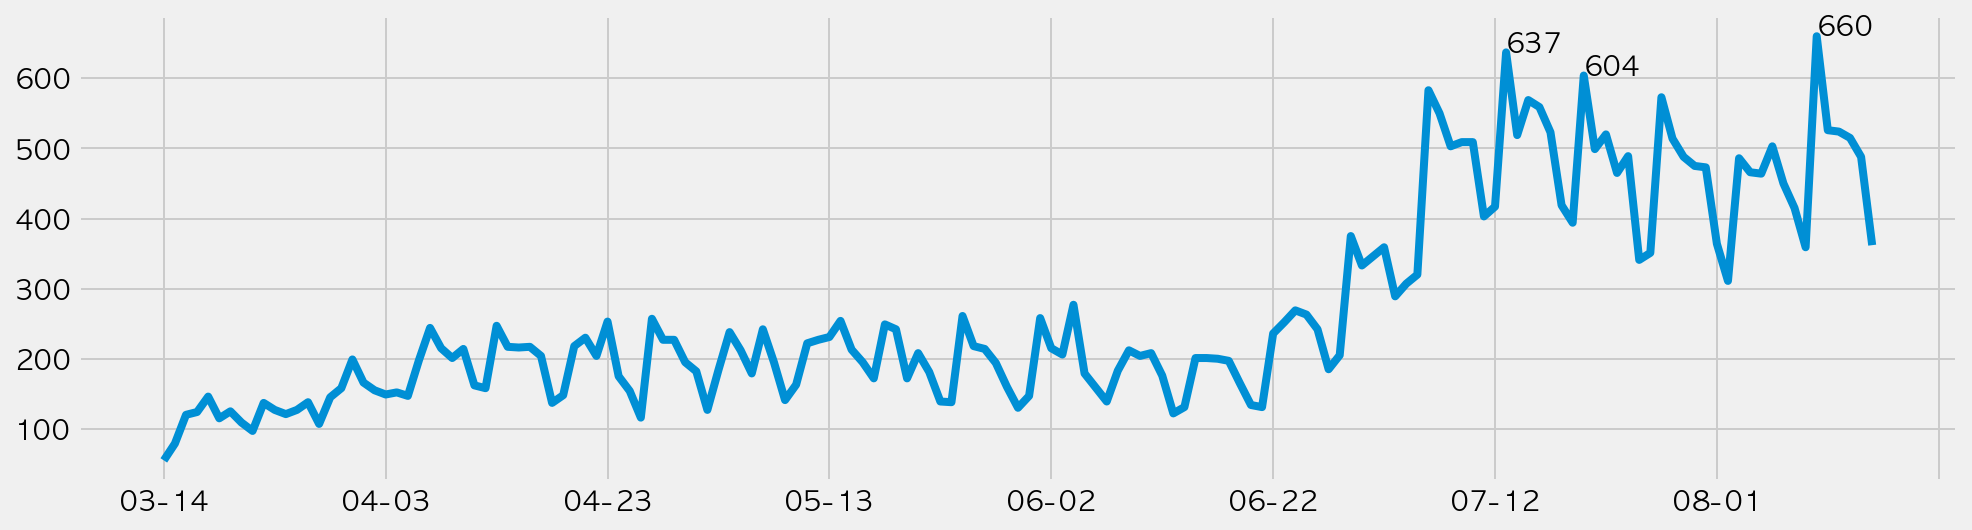

In [1374]:
# indicate the date when confirmed case is above 600
dc = day_counts.plot(figsize=(15,4))
for i in range(len(day_counts)):
    case_counts = day_counts.iloc[i]
    if case_counts > 600:
        dc.text(x=i, y=case_counts, s=case_counts)

## Date with 'Most' Confirmed Cases

In [1375]:
# summarize dairly confirmed cases by describe
day_counts.describe()

count    155.000000
mean     269.161290
std      143.722834
min       55.000000
25%      161.000000
50%      215.000000
75%      359.000000
max      660.000000
Name: Date, dtype: float64

In [1376]:
# Date with Most Confirmed Cases
day_counts[day_counts == day_counts.max()]

08-10    660
Name: Date, dtype: int64

In [1377]:
df[df["Date"] == "08-10"]

,Number,Patient,Confirmed Date,Area,Travel History,Transmission Route,Status,Month,Week,Date
2415,69305,214775,2021-08-10,Another City,-,Known,Quarantined,8,32,08-10
2416,69304,215664,2021-08-10,Yeongdeungpo-gu,-,Under Inspection,Quarantined,8,32,08-10
2417,69303,215993,2021-08-10,Gangseo-gu,-,Known,Quarantined,8,32,08-10
2418,69302,214664,2021-08-10,Seocho-gu,~8.8,Overseas,Quarantined,8,32,08-10
2419,69301,215494,2021-08-10,Seocho-gu,-,Known,Quarantined,8,32,08-10
...,...,...,...,...,...,...,...,...,...,...
3070,68650,214138,2021-08-10,Seongdong-gu,-,Under Inspection,Quarantined,8,32,08-10
3071,68649,215630,2021-08-10,Mapo-gu,-,Known,Quarantined,8,32,08-10
3072,68648,214215,2021-08-10,Seongdong-gu,-,Known,Quarantined,8,32,08-10
3073,68647,214193,2021-08-10,Seongdong-gu,-,Under Inspection,Quarantined,8,32,08-10


## Bar Graph Analysis

<AxesSubplot:>

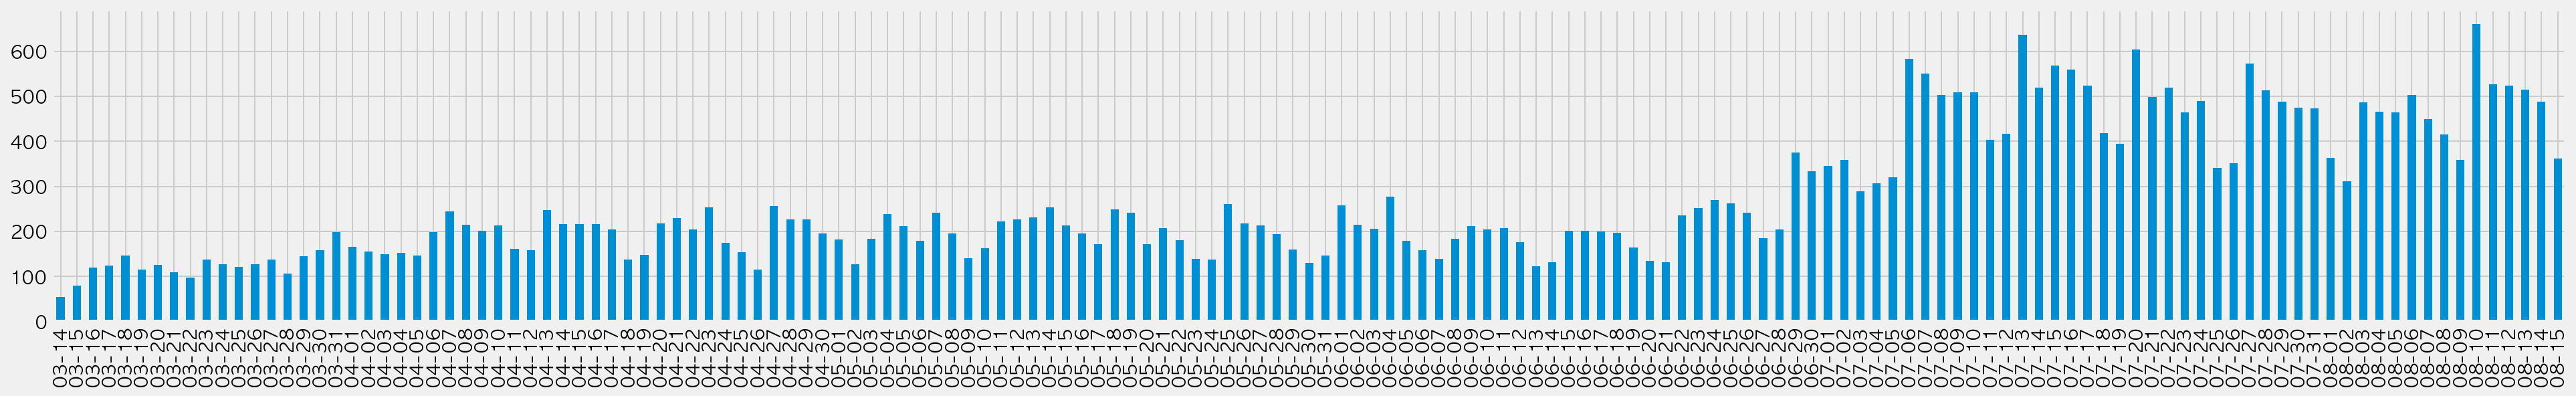

In [1378]:
day_counts.plot.bar(figsize=(30,4))

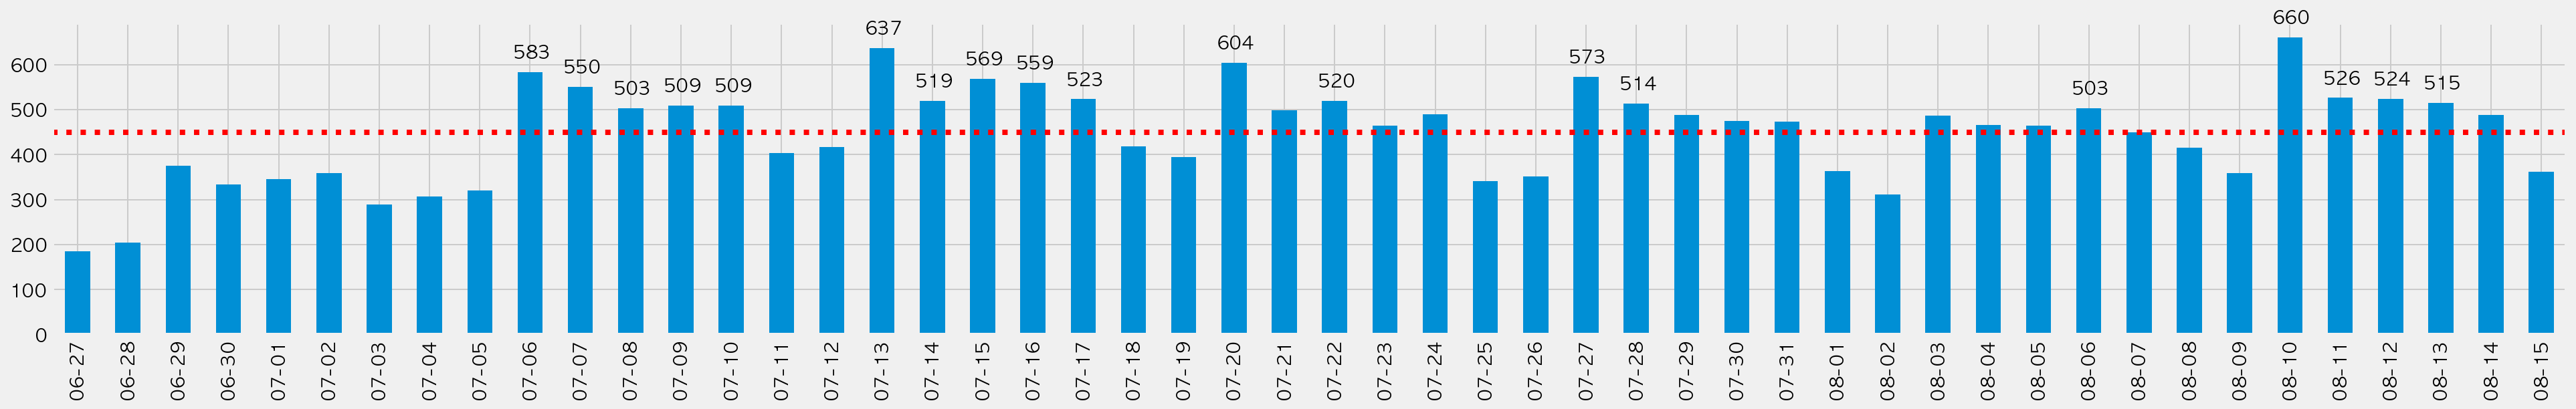

In [1379]:
# last 50 days (indicate dates over 500 cases and mean)
fifty = day_counts[-50:].plot.bar(figsize=(30,4))
plt.axhline(day_counts[-50:].mean(), color="red", linestyle=":")

for i in range(50):
    case_counts = day_counts[-50:].iloc[i]
    if case_counts > 500:
        fifty.text(x=i-0.35, y=case_counts+30, s=case_counts)

## Analysis by 'Month'

<AxesSubplot:>

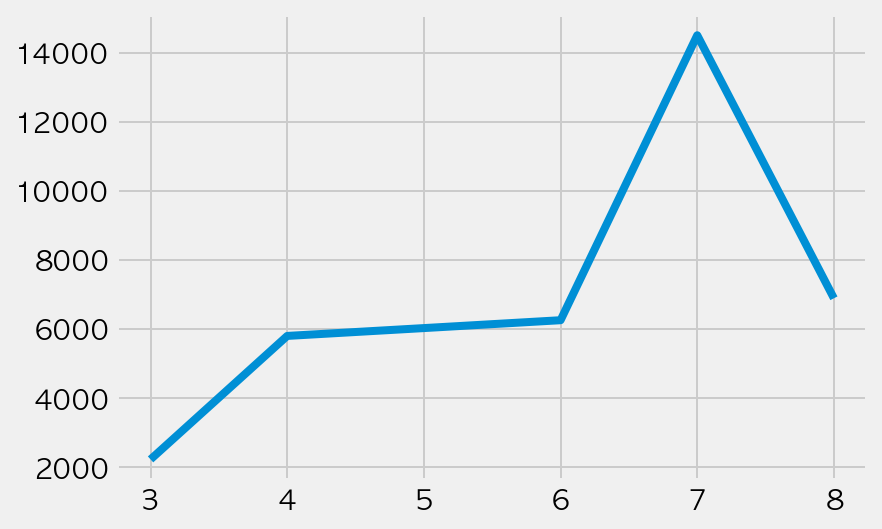

In [1380]:
monthly_case = df["Month"].value_counts().sort_index()
monthly_case.plot()

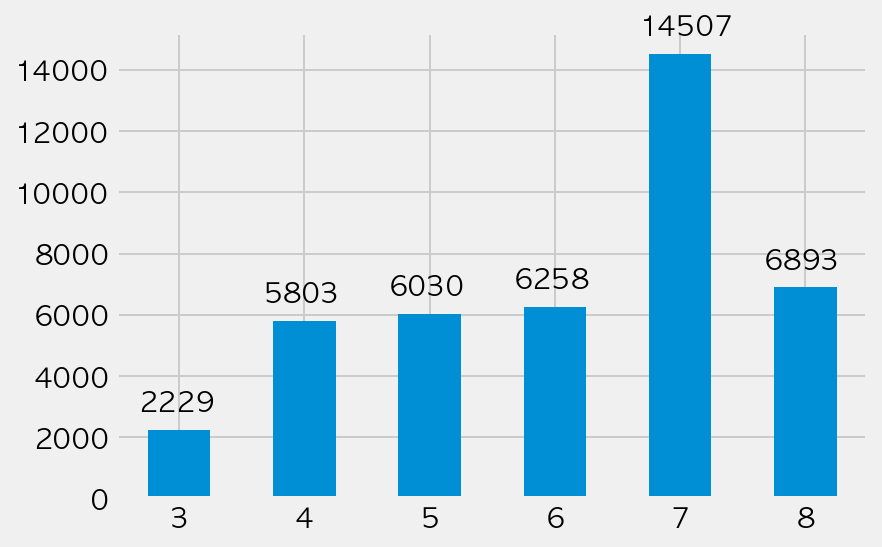

In [1381]:
mcp = monthly_case.plot.bar(rot=0)

for i in range(len(month_cases)):
    mcp.text(x=i-0.33, y=monthly_case.iloc[i]+600, s=monthly_case.iloc[i])

## Analysis by 'Week'

<AxesSubplot:>

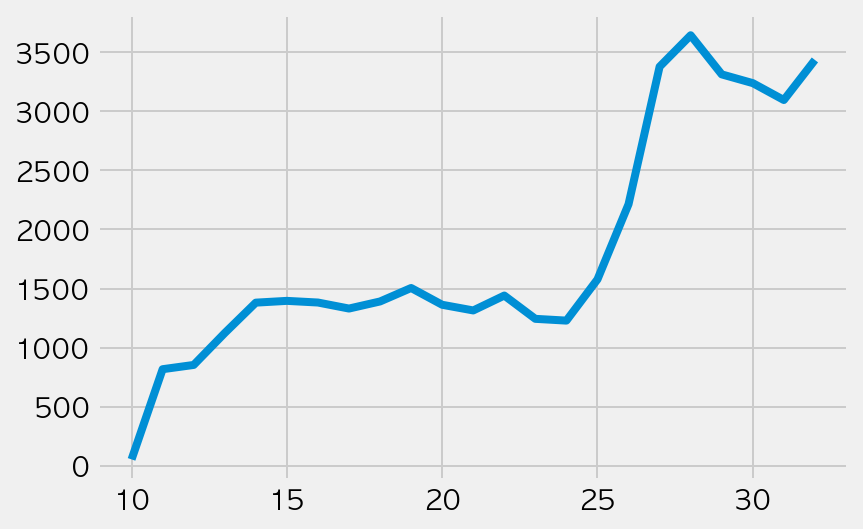

In [1382]:
weekly_case = df["Week"].value_counts().sort_index()
weekly_case.plot()

<AxesSubplot:>

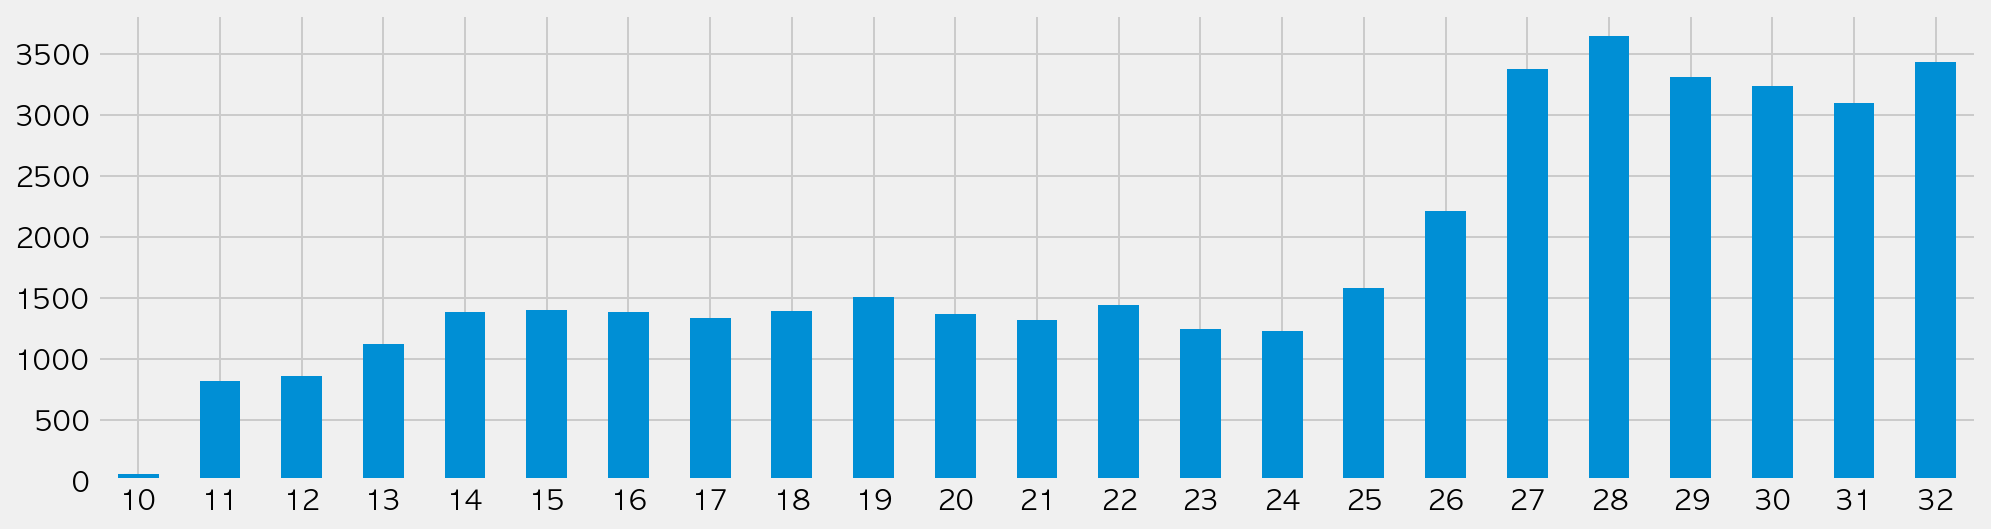

In [1383]:
weekly_case.plot.bar(figsize=(15,4), rot=0)

In [1384]:
# month-week together
month_weekly_case = df.groupby(["Month", "Week"])["Number"].size()
month_weekly_case

Month  Week
3      10        55
       11       818
       12       854
       13       502
4      13       622
       14      1381
       15      1396
       16      1382
       17      1022
5      17       309
       18      1391
       19      1505
       20      1363
       21      1315
       22       147
6      22      1294
       23      1244
       24      1229
       25      1578
       26       913
7      26      1301
       27      3377
       28      3643
       29      3312
       30      2874
8      30       364
       31      3095
       32      3434
Name: Number, dtype: int64

<AxesSubplot:xlabel='Month,Week'>

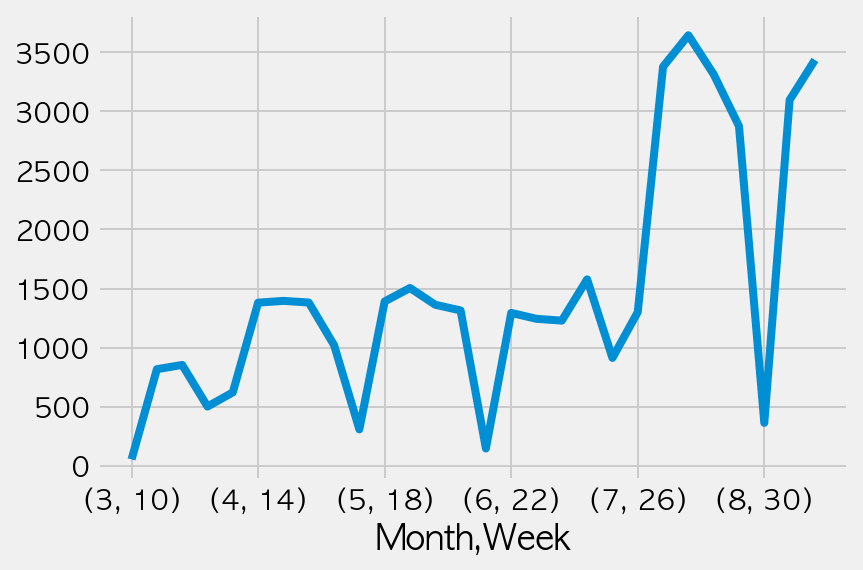

In [1385]:
month_weekly_case.plot()

<AxesSubplot:xlabel='Month,Week'>

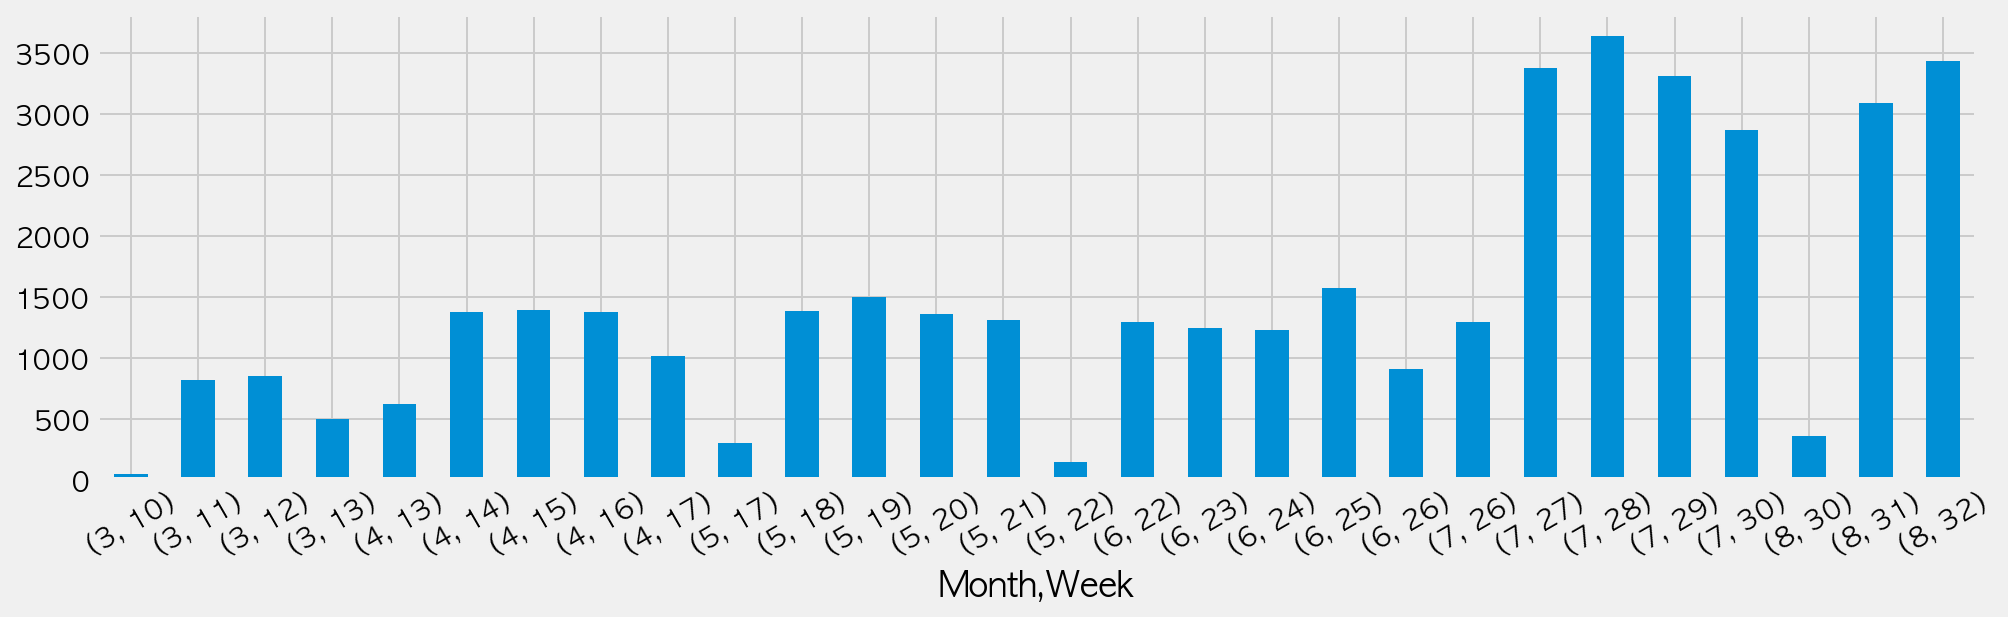

In [1386]:
month_weekly_case.plot.bar(figsize=(15,4),rot=30)

## Creating Rows for All Dates

In [1387]:
# find first and last date in dataset
first_day = df.iloc[-1,2]
last_day = df.iloc[0,2]

In [1388]:
# Make DataTimeIndex and store it as 'days' by pd.date_range 
days = pd.date_range(first_day, last_day)
days[:5]

DatetimeIndex(['2021-03-14', '2021-03-15', '2021-03-16', '2021-03-17',
               '2021-03-18'],
              dtype='datetime64[ns]', freq='D')

In [1389]:
df_days = pd.DataFrame({"Confirmed Date":days})
df_days.head()

,Confirmed Date
0,2021-03-14
1,2021-03-15
2,2021-03-16
3,2021-03-17
4,2021-03-18


In [1390]:
daily_case = df["Confirmed Date"].value_counts()
daily_case.head()

2021-08-10    660
2021-07-13    637
2021-07-20    604
2021-07-06    583
2021-07-27    573
Name: Confirmed Date, dtype: int64

In [1391]:
df_daily_case = daily_case.to_frame()
df_daily_case.head()

,Confirmed Date
2021-08-10,660
2021-07-13,637
2021-07-20,604
2021-07-06,583
2021-07-27,573


In [1392]:
df_daily_case.columns = ["Number of Cases"]
df_daily_case.head()

,Number of Cases
2021-08-10,660
2021-07-13,637
2021-07-20,604
2021-07-06,583
2021-07-27,573


In [1393]:
# to express dates with 'no' confirmed cases
# standard is "Confirmed Date" column in df_days and index in df_daily_case
# to express empty dates, how="left"
all_days = df_days.merge(df_daily_case, left_on="Confirmed Date", right_on=df_daily_case.index, how="left")
all_days

,Confirmed Date,Number of Cases
0,2021-03-14,55
1,2021-03-15,79
2,2021-03-16,120
3,2021-03-17,124
4,2021-03-18,146
...,...,...
150,2021-08-11,526
151,2021-08-12,524
152,2021-08-13,515
153,2021-08-14,488


## Cumulative Cases in Seoul

In [1394]:
# fill empty rows by fillna
all_days["Number of Cases"] = all_days["Number of Cases"].fillna(0)
all_days["Cumulative"] = all_days["Number of Cases"].cumsum()
all_days

,Confirmed Date,Number of Cases,Cumulative
0,2021-03-14,55,55
1,2021-03-15,79,134
2,2021-03-16,120,254
3,2021-03-17,124,378
4,2021-03-18,146,524
...,...,...,...
150,2021-08-11,526,39831
151,2021-08-12,524,40355
152,2021-08-13,515,40870
153,2021-08-14,488,41358


In [1395]:
all_days["Date"] = all_days["Confirmed Date"].astype(str).map(lambda x : x[-5:])
all_days.head()

,Confirmed Date,Number of Cases,Cumulative,Date
0,2021-03-14,55,55,03-14
1,2021-03-15,79,134,03-15
2,2021-03-16,120,254,03-16
3,2021-03-17,124,378,03-17
4,2021-03-18,146,524,03-18


In [1396]:
cum_days = all_days[["Number of Cases","Cumulative","Date"]]
cum_days = cum_days.set_index("Date")
cum_days.head()

,Number of Cases,Cumulative
Date,,
03-14,55,55
03-15,79,134
03-16,120,254
03-17,124,378
03-18,146,524


<AxesSubplot:xlabel='Date'>

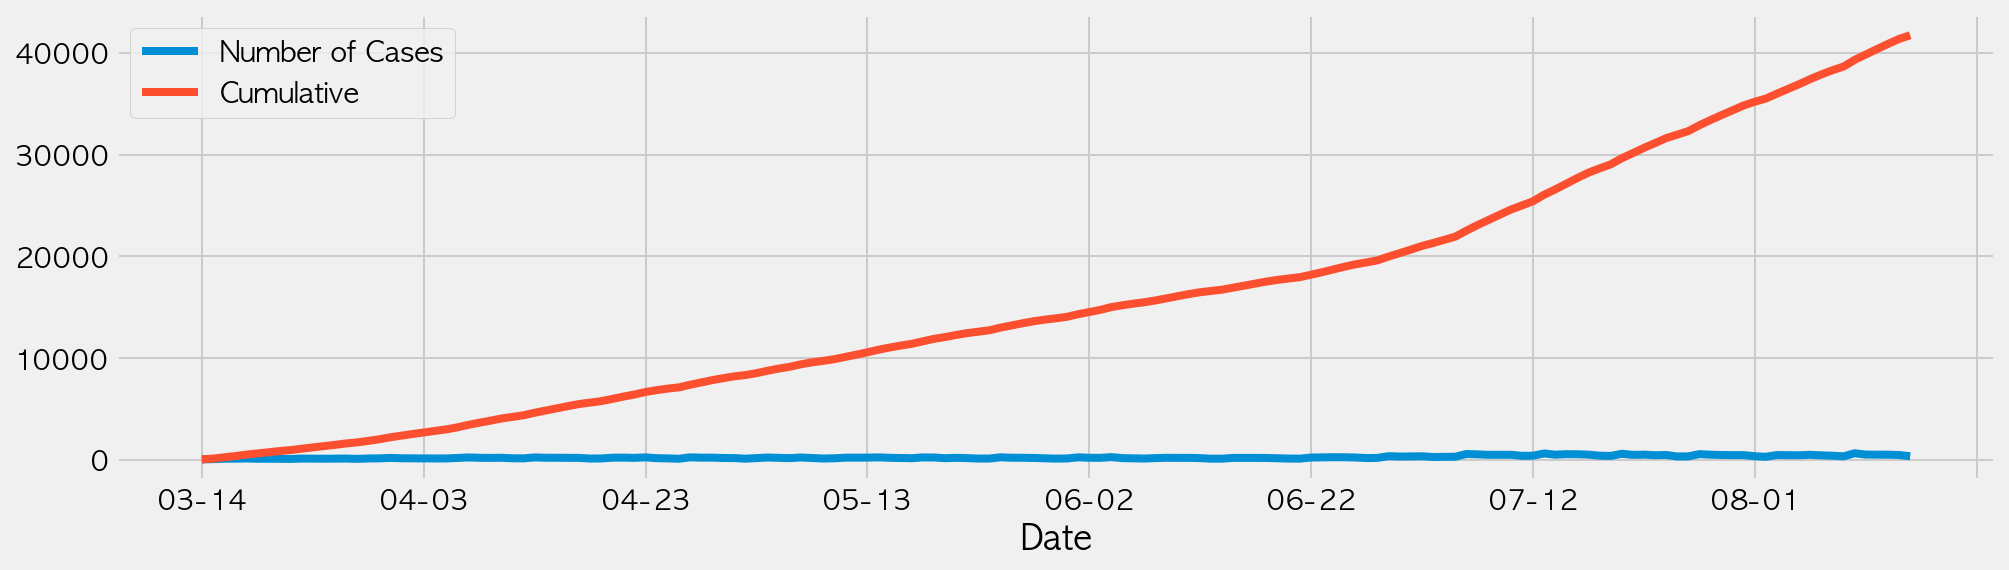

In [1397]:
# daily number of cases and cumulative number of cases together on a same graph frame
cum_days.plot(figsize=(15,4))

### Log Scale Applied

<AxesSubplot:xlabel='Date'>

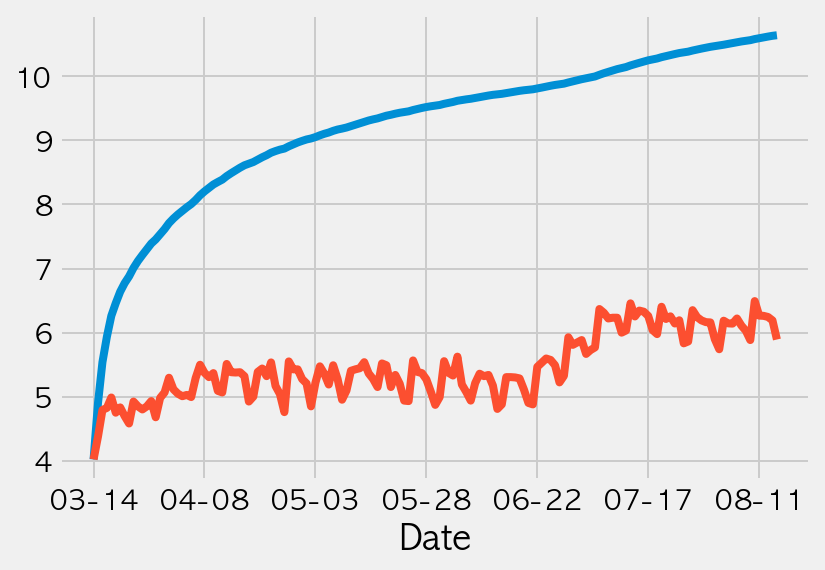

In [1398]:
np.log(cum_days["Cumulative"] + 1).plot()
np.log(cum_days["Number of Cases"] + 1).plot()

## Analysis by 'Day of the Week'

In [1399]:
all_days["Month"] = all_days["Confirmed Date"].dt.month
all_days["Day of Week"] = all_days["Confirmed Date"].dt.dayofweek
all_days.head()

,Confirmed Date,Number of Cases,Cumulative,Date,Month,Day of Week
0,2021-03-14,55,55,03-14,3,6
1,2021-03-15,79,134,03-15,3,0
2,2021-03-16,120,254,03-16,3,1
3,2021-03-17,124,378,03-17,3,2
4,2021-03-18,146,524,03-18,3,3


In [1400]:
all_days_week = all_days.groupby(["Month","Day of Week"])["Number of Cases"].sum()
all_days_week = all_days_week.unstack().astype(int)
all_days_week

Day of Week,0,1,2,3,4,5,6
Month,,,,,,,
3,321,415,450,267,242,263,271
4,569,920,918,1028,1021,742,605
5,804,970,899,796,898,931,732
6,606,1253,1213,879,945,762,600
7,1482,2397,2082,2426,2367,2283,1470
8,670,1146,992,988,1018,938,1141


In [1401]:
daysofweek = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
all_days_week.columns = daysofweek
all_days_week

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Month,,,,,,,
3,321,415,450,267,242,263,271
4,569,920,918,1028,1021,742,605
5,804,970,899,796,898,931,732
6,606,1253,1213,879,945,762,600
7,1482,2397,2082,2426,2367,2283,1470
8,670,1146,992,988,1018,938,1141


In [1402]:
# express with colours by style.background_gradient
all_days_week.style.background_gradient(cmap="Blues")

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Month,,,,,,,
3,321,415,450,267,242,263,271
4,569,920,918,1028,1021,742,605
5,804,970,899,796,898,931,732
6,606,1253,1213,879,945,762,600
7,1482,2397,2082,2426,2367,2283,1470
8,670,1146,992,988,1018,938,1141


# 2. Covid-19 Analysis by 'Area'

In [1403]:
gu_count = df["Area"].value_counts()
gu_count.head()

Gangnam-gu      3677
Songpa-gu       2669
Gwanak-gu       2542
Seocho-gu       2162
Another City    2072
Name: Area, dtype: int64

In [1404]:
# 'Another City' means a patient's residence is not Seoul, but is confirmed at the test center in Seoul
not_seoul_residence = (["Another City"])
set(gu_count.index) - set(not_seoul_residence)

{'Dobong-gu',
 'Dongdaemun-gu',
 'Dongjak-gu',
 'Eunpyeong-gu',
 'Gangdong-gu',
 'Gangnam-gu',
 'Gangseo-gu',
 'Geumcheon-gu',
 'Guro-gu',
 'Gwanak-gu',
 'Gwangjin-gu',
 'Jongno-gu',
 'Jung-gu',
 'Jungnang-gu',
 'Mapo-gu',
 'Nowon-gu',
 'Seocho-gu',
 'Seodaemun-gu',
 'Seongbuk-gu',
 'Seongdong-gu',
 'Songpa-gu',
 'Yangcheon-gu',
 'Yeongdeungpo-gu',
 'Yongsan-gu',
 'angbuk-gu'}

<img src="seoul_map.jpeg" stype="width:10px;height:5px"/>

<AxesSubplot:>

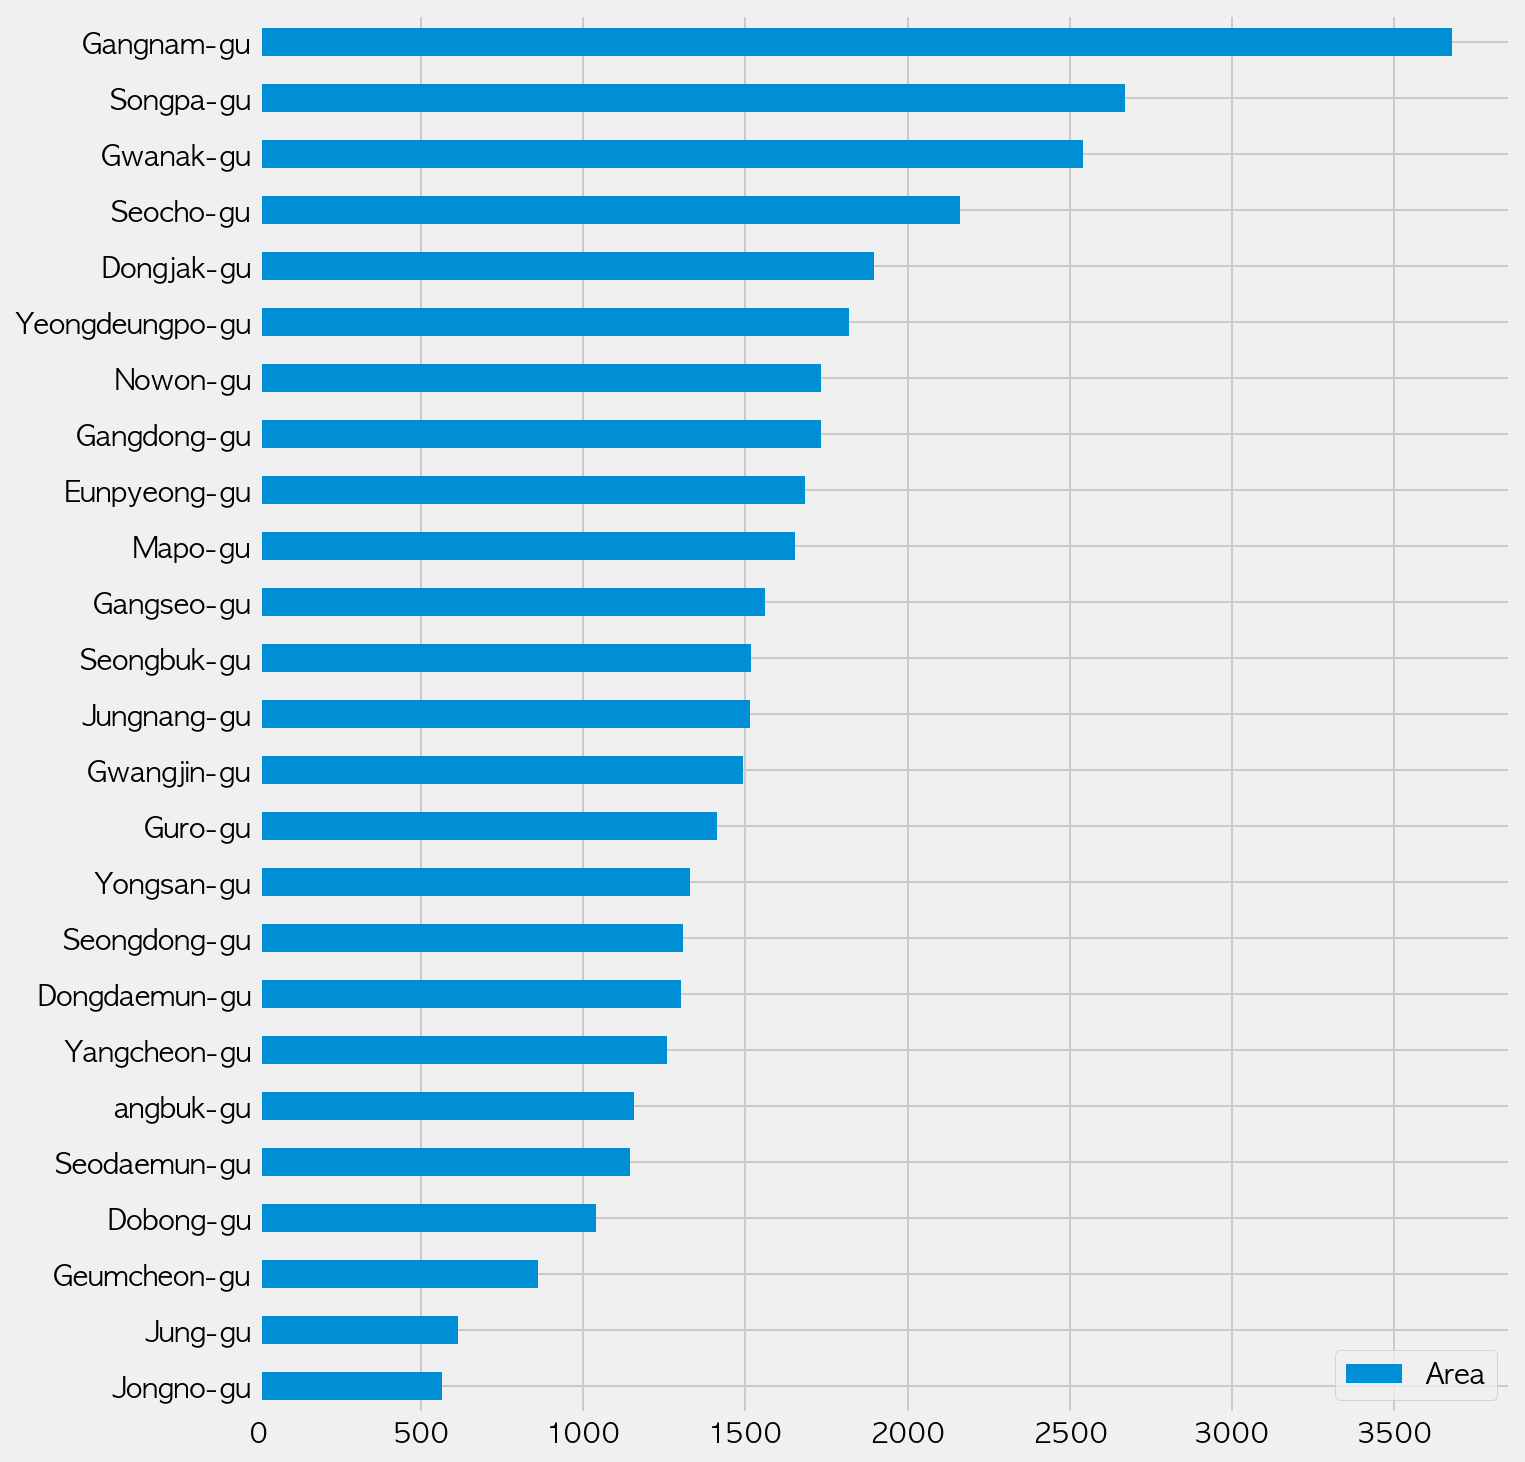

In [1405]:
only_seoul_residents = pd.DataFrame(gu_count).drop(index=["Another City"])
only_seoul_residents.sort_values(by="Area").plot.barh(figsize=(10,12))

# 3. Analysis by 'Transmission Route'

In [1406]:
df["Transmission Route"].value_counts()

Known               26862
Under Inspection    13738
Unknown               567
Overseas              553
Name: Transmission Route, dtype: int64

In [1407]:
df["Transmission Route"].unique()

array(['Under Inspection', 'Known', 'Overseas', 'Unknown'], dtype=object)

In [1408]:
# confirmed cases that transmission route are known after inspection
df.loc[df["Transmission Route"].str.contains("Known"), "Transmission Route"]

1        Known
2        Known
6        Known
7        Known
8        Known
         ...  
41714    Known
41715    Known
41717    Known
41718    Known
41719    Known
Name: Transmission Route, Length: 26862, dtype: object

<AxesSubplot:>

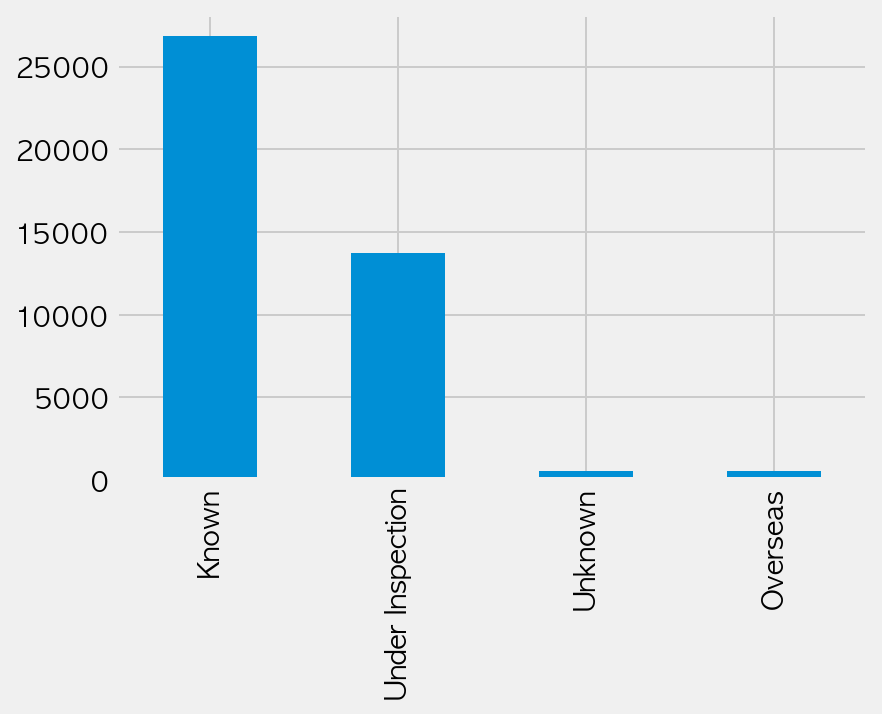

In [1409]:
df["Transmission Route"].value_counts().plot.bar()

### Unknown Transmission Route

In [1410]:
df_unknown = df[df["Transmission Route"] == "Unknown"]
df_under_inspection = df[df["Transmission Route"] == "Under Inspection"]

<AxesSubplot:xlabel='Month,Week'>

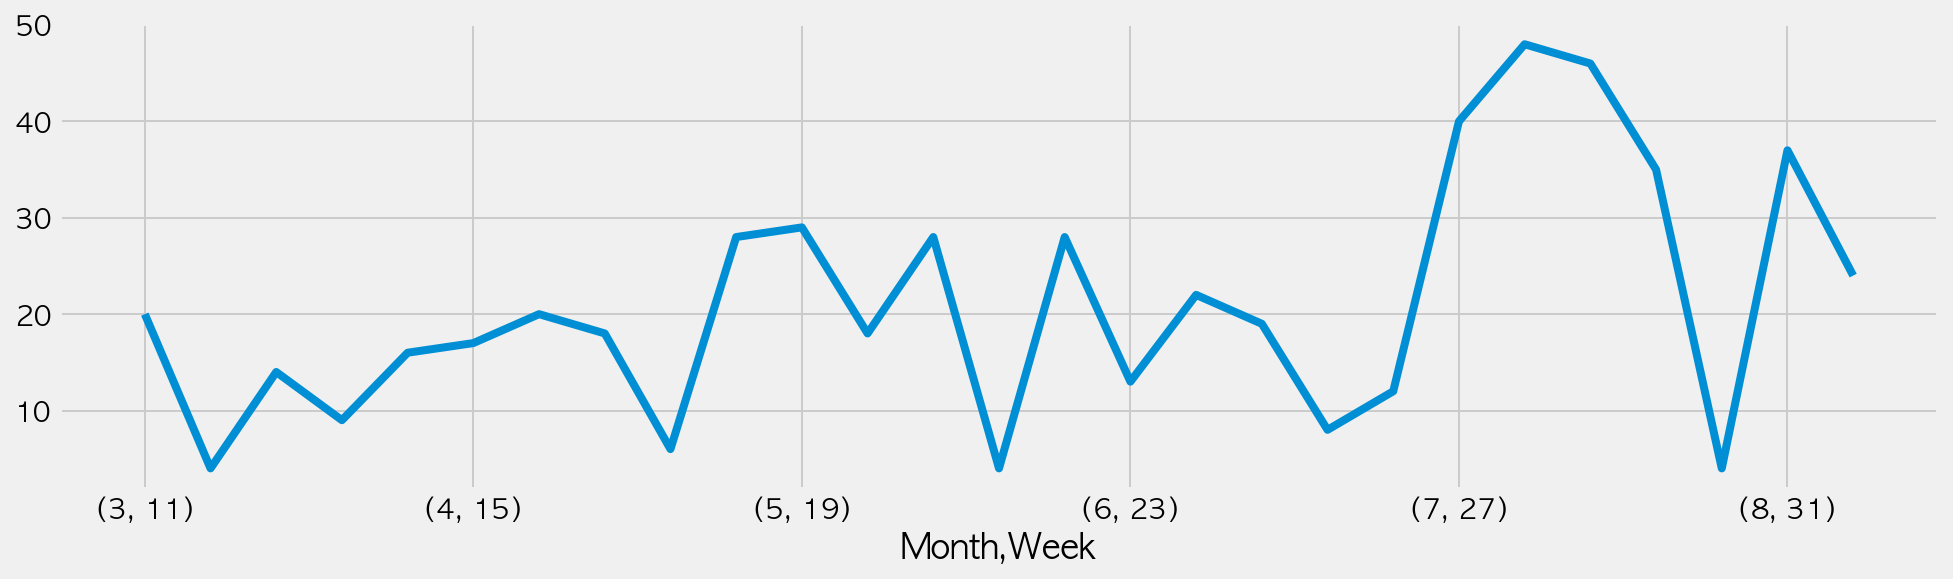

In [1411]:
unknown_weekly_cases = df_unknown.groupby(["Month","Week"])["Number"].count()
unknown_weekly_cases.plot(figsize=(15,4))

<AxesSubplot:xlabel='Month,Week'>

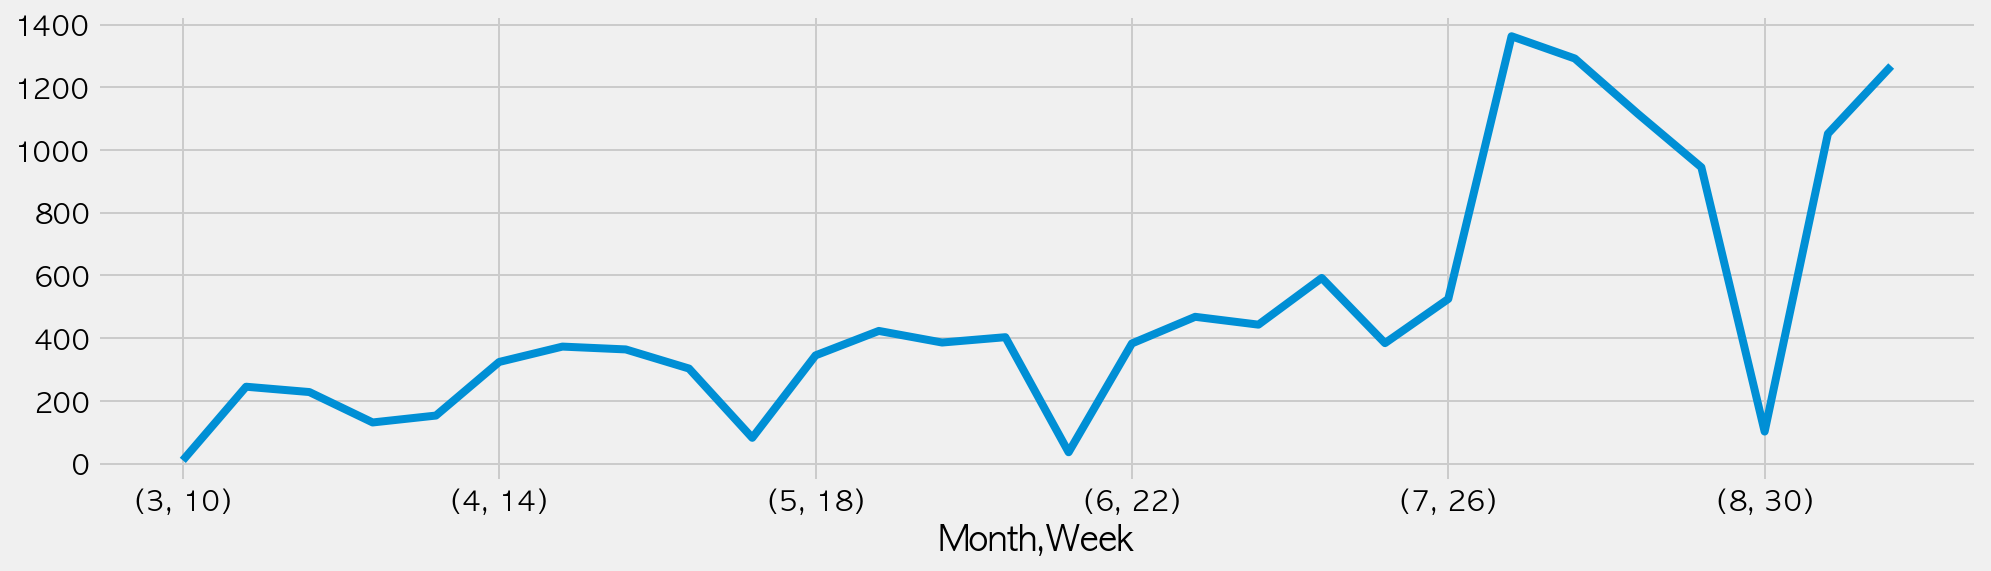

In [1412]:
under_inspection_weekly_cases = df_under_inspection.groupby(["Month","Week"])["Number"].count()
under_inspection_weekly_cases.plot(figsize=(15,4))

### Trend Analysis: 'Unknown' transmission route and route 'under inspection' show similar trends 

# 4. Analysis by 'Patients Status'

In [1414]:
df_recovered = df["Status"].str.contains("Recovered")
df_death = df["Status"].str.contains("Death")
df_quarantined = df["Status"].str.contains("Quarantined")

In [1415]:
df_recovered.value_counts()

True     32131
False     9589
Name: Status, dtype: int64

In [1416]:
# recovery rate
df_recovered.value_counts(normalize=True) * 100

True     77.01582
False    22.98418
Name: Status, dtype: float64

In [1417]:
# death rate
df_death.value_counts(normalize=True) * 100

False    99.719559
True      0.280441
Name: Status, dtype: float64

In [1418]:
# Longest quarantined patient since data is collected
df[(df["Status"] != "Recovered") & (df["Status"] != "Quarantined")].tail()

,Number,Patient,Confirmed Date,Area,Travel History,Transmission Route,Status,Month,Week,Date
41073,30647,98253,2021-03-20,Gwangjin-gu,-,Under Inspection,Death,3,11,03-20
41247,30473,97570,2021-03-18,Gangdong-gu,-,Known,Death,3,11,03-18
41354,30366,97174,2021-03-17,Eunpyeong-gu,-,Under Inspection,Death,3,11,03-17
41509,30211,96602,2021-03-16,Yongsan-gu,-,Known,Death,3,11,03-16
41665,30055,95636,2021-03-14,Dongdaemun-gu,-,Known,Death,3,10,03-14


# 5. Analysis by 'Travel History'

In [1419]:
# Consider '-' as empty 
df["Overseas"] = df["Travel History"]
df["Overseas"] = df["Overseas"].str.strip()
df["Overseas"] = df["Overseas"].replace("-",np.nan)
df["Overseas"].unique()

array([nan, '러시아', '일본', '멕시코', '불가리아', '미국', '스웨덴', '조지아', '우즈베키스탄',
       '키르기스스탄', '필리핀', '몽골', '독일', '폴란드', '아랍에미레이트', '카자흐스탄',
       '기타 확진자 접촉', '인도네시아', '스리랑카', '중국', '네덜란드', '인도', '터키', '파라과이',
       '가나', '~8.8', '영국', '체코', '아랍에미리트', '우크라이나', '모잠비크', '키르키스스탄',
       '베트남', '태국', '몰타', '캐나다', '미얀마', '이라크', '프랑스', '모스크바', '방글라데시',
       '파키스탄', '네날', '네팔', '러시아(두바이경유)', '아프리카 말라위', '말레이시아', '자카르타',
       '케냐', '쿠웨이트', 'UAE', '캄보디아', '아랍에메리드(두바이)', '미국 괌', '으즈베키스탄',
       '말레이지아', '인도네시아 자카르타', '스페인마드리드', '타지키스탄', '키르키스탄', '도미니카공화국',
       '아프카니스탄', '시에라리온', '마포행복나눔마켓', '핀란드', '키르기스탄', '콜롬비아', '덴마크',
       '싱가폴', '브라질', '오만', '아프가니스탄', '아일랜드', '이스라엘', '아랍에미리트연합',
       '남아프리카공화국', '잠비아(아디스아바바)', '이집트', '짐바브웨', '이집트(카타르)',
       '방글라데시,아랍에미리트', '21.5.13', '사우디아라비아', '마케도니아', '중국(시안)', '이란',
       '헝가리', '파푸아뉴기니(포트모르즈비)', '파푸아뉴기니', '페루', '21.4.7', '강릉', '수단',
       '스위스', '중국(장춘)', '카타르', '인도 델리', '멕시코(미국경유)', '오스트리아', '베네수엘라'],
      dtype=object)

In [1420]:
df["Overseas"].describe()

count     570
unique     99
top        미국
freq      105
Name: Overseas, dtype: object

In [1421]:
df["Overseas"].value_counts()

미국             105
인도네시아           53
러시아             37
우즈베키스탄          26
일본              22
              ... 
스페인마드리드          1
잠비아(아디스아바바)      1
베트남              1
21.4.7           1
이집트(카타르)         1
Name: Overseas, Length: 99, dtype: int64

### Subset Data with 'Travel History'

In [1422]:
df_overseas = df[df["Overseas"].notnull()].copy()
df_overseas.shape

(570, 11)

In [1423]:
df_overseas.head()

,Number,Patient,Confirmed Date,Area,Travel History,Transmission Route,Status,Month,Week,Date,Overseas
12,71708,225106,2021-08-15,Seongbuk-gu,러시아,Overseas,Quarantined,8,32,08-15,러시아
25,71695,224949,2021-08-15,Seongbuk-gu,일본,Overseas,Quarantined,8,32,08-15,일본
37,71683,225425,2021-08-15,Yongsan-gu,멕시코,Overseas,Quarantined,8,32,08-15,멕시코
43,71677,225223,2021-08-15,Seodaemun-gu,불가리아,Overseas,Quarantined,8,32,08-15,불가리아
66,71654,224927,2021-08-15,Gangnam-gu,미국,Overseas,Quarantined,8,32,08-15,미국


### Text Data Preprocessing

In [1424]:
europe = "체코|헝가리|오스트리아|이탈리아|프랑스|영국|스페인|모로코|독일|폴란드|터키|아일랜드|네덜란드|스웨덴|덴마크|스위스|러시아|불가리아|조지아|모스크바"
df_overseas[df_overseas["Overseas"].str.contains(europe)].head()

,Number,Patient,Confirmed Date,Area,Travel History,Transmission Route,Status,Month,Week,Date,Overseas
12,71708,225106,2021-08-15,Seongbuk-gu,러시아,Overseas,Quarantined,8,32,08-15,러시아
43,71677,225223,2021-08-15,Seodaemun-gu,불가리아,Overseas,Quarantined,8,32,08-15,불가리아
72,71648,225349,2021-08-15,Gwangjin-gu,스웨덴,Overseas,Quarantined,8,32,08-15,스웨덴
149,71571,224830,2021-08-15,Nowon-gu,조지아,Overseas,Quarantined,8,32,08-15,조지아
343,71377,224687,2021-08-15,Dongjak-gu,러시아,Overseas,Quarantined,8,32,08-15,러시아


In [1425]:
south_america = "브라질|아르헨티나|칠레|볼리비아|멕시코|페루|베네수엘라|몰타|파라과이|콜롬비아"
df_overseas[df_overseas["Overseas"].str.contains(south_america)].head()

,Number,Patient,Confirmed Date,Area,Travel History,Transmission Route,Status,Month,Week,Date,Overseas
37,71683,225425,2021-08-15,Yongsan-gu,멕시코,Overseas,Quarantined,8,32,08-15,멕시코
1702,70018,219667,2021-08-12,Gangseo-gu,파라과이,Overseas,Quarantined,8,32,08-12,파라과이
4275,67445,209739,2021-08-07,Seongdong-gu,몰타,Overseas,Quarantined,8,31,08-07,몰타
12962,58758,179955,2021-07-19,Another City,멕시코,Overseas,Recovered,7,29,07-19,멕시코
23735,47985,151996,2021-06-22,Mapo-gu,콜롬비아,Overseas,Recovered,6,25,06-22,콜롬비아


In [1426]:
other_asia = "인도네시아|베트남|싱가포르|태국|필리핀|스리랑카|방글라데시|미얀마|말레이시아|몽골"
df_overseas[df_overseas["Overseas"].str.contains(other_asia)].head()

,Number,Patient,Confirmed Date,Area,Travel History,Transmission Route,Status,Month,Week,Date,Overseas
668,71052,223747,2021-08-14,Gangnam-gu,필리핀,Under Inspection,Quarantined,8,32,08-14,필리핀
803,70917,222664,2021-08-14,Dongdaemun-gu,몽골,Overseas,Quarantined,8,32,08-14,몽골
804,70916,222667,2021-08-14,Dongdaemun-gu,몽골,Overseas,Quarantined,8,32,08-14,몽골
805,70915,222668,2021-08-14,Dongdaemun-gu,몽골,Overseas,Quarantined,8,32,08-14,몽골
1396,70324,220018,2021-08-12,Jongno-gu,인도네시아,Overseas,Quarantined,8,32,08-12,인도네시아


In [1441]:
area = "Europe|South America|Canada|USA|Japan|China|India|Australia/New Zealand|South Asia|West Asia/Middle East|Africa"
df_overseas.loc[df_overseas["Overseas"].str.contains(europe), "Overseas"] = "Europe"
df_overseas.loc[df_overseas["Overseas"].str.contains(south_america), "Overseas"] = "South America"
df_overseas.loc[df_overseas["Overseas"].str.contains("캐나다"), "Overseas"] = "Canada"
df_overseas.loc[df_overseas["Overseas"].str.contains("미국"), "Overseas"] = "USA"
df_overseas.loc[df_overseas["Overseas"].str.contains("일본"), "Overseas"] = "Japan"
df_overseas.loc[df_overseas["Overseas"].str.contains("중국"), "Overseas"] = "China"
df_overseas.loc[df_overseas["Overseas"].str.contains("인도"), "Overseas"] = "India"
df_overseas.loc[df_overseas["Overseas"].str.contains("호주|뉴질랜드"), "Overseas"] = "Australia/New Zealand"
df_overseas.loc[df_overseas["Overseas"].str.contains("스탄|아랍|이라크|카타르|우크라이나|쿠웨이트|UAE|사우디|이란"), "Overseas"] = "West Asia/Middle East"
df_overseas.loc[df_overseas["Overseas"].str.contains("수단|가나|케냐"), "Overseas"] = "Africa"
df_overseas.loc[~df_overseas["Overseas"].str.contains(area), "Overseas"] = "Other Asia"
df_overseas[df_overseas["Overseas"] == "Other Asia"].head()

,Number,Patient,Confirmed Date,Area,Travel History,Transmission Route,Status,Month,Week,Date,Overseas
668,71052,223747,2021-08-14,Gangnam-gu,필리핀,Under Inspection,Quarantined,8,32,08-14,Other Asia
803,70917,222664,2021-08-14,Dongdaemun-gu,몽골,Overseas,Quarantined,8,32,08-14,Other Asia
804,70916,222667,2021-08-14,Dongdaemun-gu,몽골,Overseas,Quarantined,8,32,08-14,Other Asia
805,70915,222668,2021-08-14,Dongdaemun-gu,몽골,Overseas,Quarantined,8,32,08-14,Other Asia
1381,70339,220178,2021-08-12,Songpa-gu,기타 확진자 접촉,Known,Quarantined,8,32,08-12,Other Asia


### Visualization and Analysis

In [1436]:
# overseas travel total number
df_overseas.groupby("Overseas")["Number"].count()

Overseas
Africa                     5
Canada                     7
China                      8
Europe                   124
India                     76
Japan                     22
Other Asia                93
South America             17
USA                      107
West Asia/Middle East    111
Name: Number, dtype: int64

In [1439]:
# confirmed date and overseas
day_oversea = df_overseas.groupby(["Confirmed Date","Overseas"])["Number"].count()
day_oversea.head()

Confirmed Date  Overseas             
2021-03-15      Europe                   1
                India                    2
                USA                      1
2021-03-18      South America            1
                West Asia/Middle East    1
Name: Number, dtype: int64

In [1440]:
day_oversea = day_oversea.groupby(level=[1]).cumsum()
day_oversea

Confirmed Date  Overseas             
2021-03-15      Europe                     1
                India                      2
                USA                        1
2021-03-18      South America              1
                West Asia/Middle East      1
                                        ... 
2021-08-14      West Asia/Middle East    111
2021-08-15      Europe                   124
                Japan                     22
                South America             17
                USA                      107
Name: Number, Length: 387, dtype: int64

In [1443]:
df_day_oversea = day_oversea.reset_index()
df_day_oversea.rename(columns={"Number":"Cumulative Case Number"})
df_day_oversea.head()

,Confirmed Date,Overseas,Number
0,2021-03-15,Europe,1
1,2021-03-15,India,2
2,2021-03-15,USA,1
3,2021-03-18,South America,1
4,2021-03-18,West Asia/Middle East,1


In [1448]:
oversea_count = df_overseas["Overseas"].value_counts()
oversea_count

Europe                   124
West Asia/Middle East    111
USA                      107
Other Asia                93
India                     76
Japan                     22
South America             17
China                      8
Canada                     7
Africa                     5
Name: Overseas, dtype: int64

<AxesSubplot:>

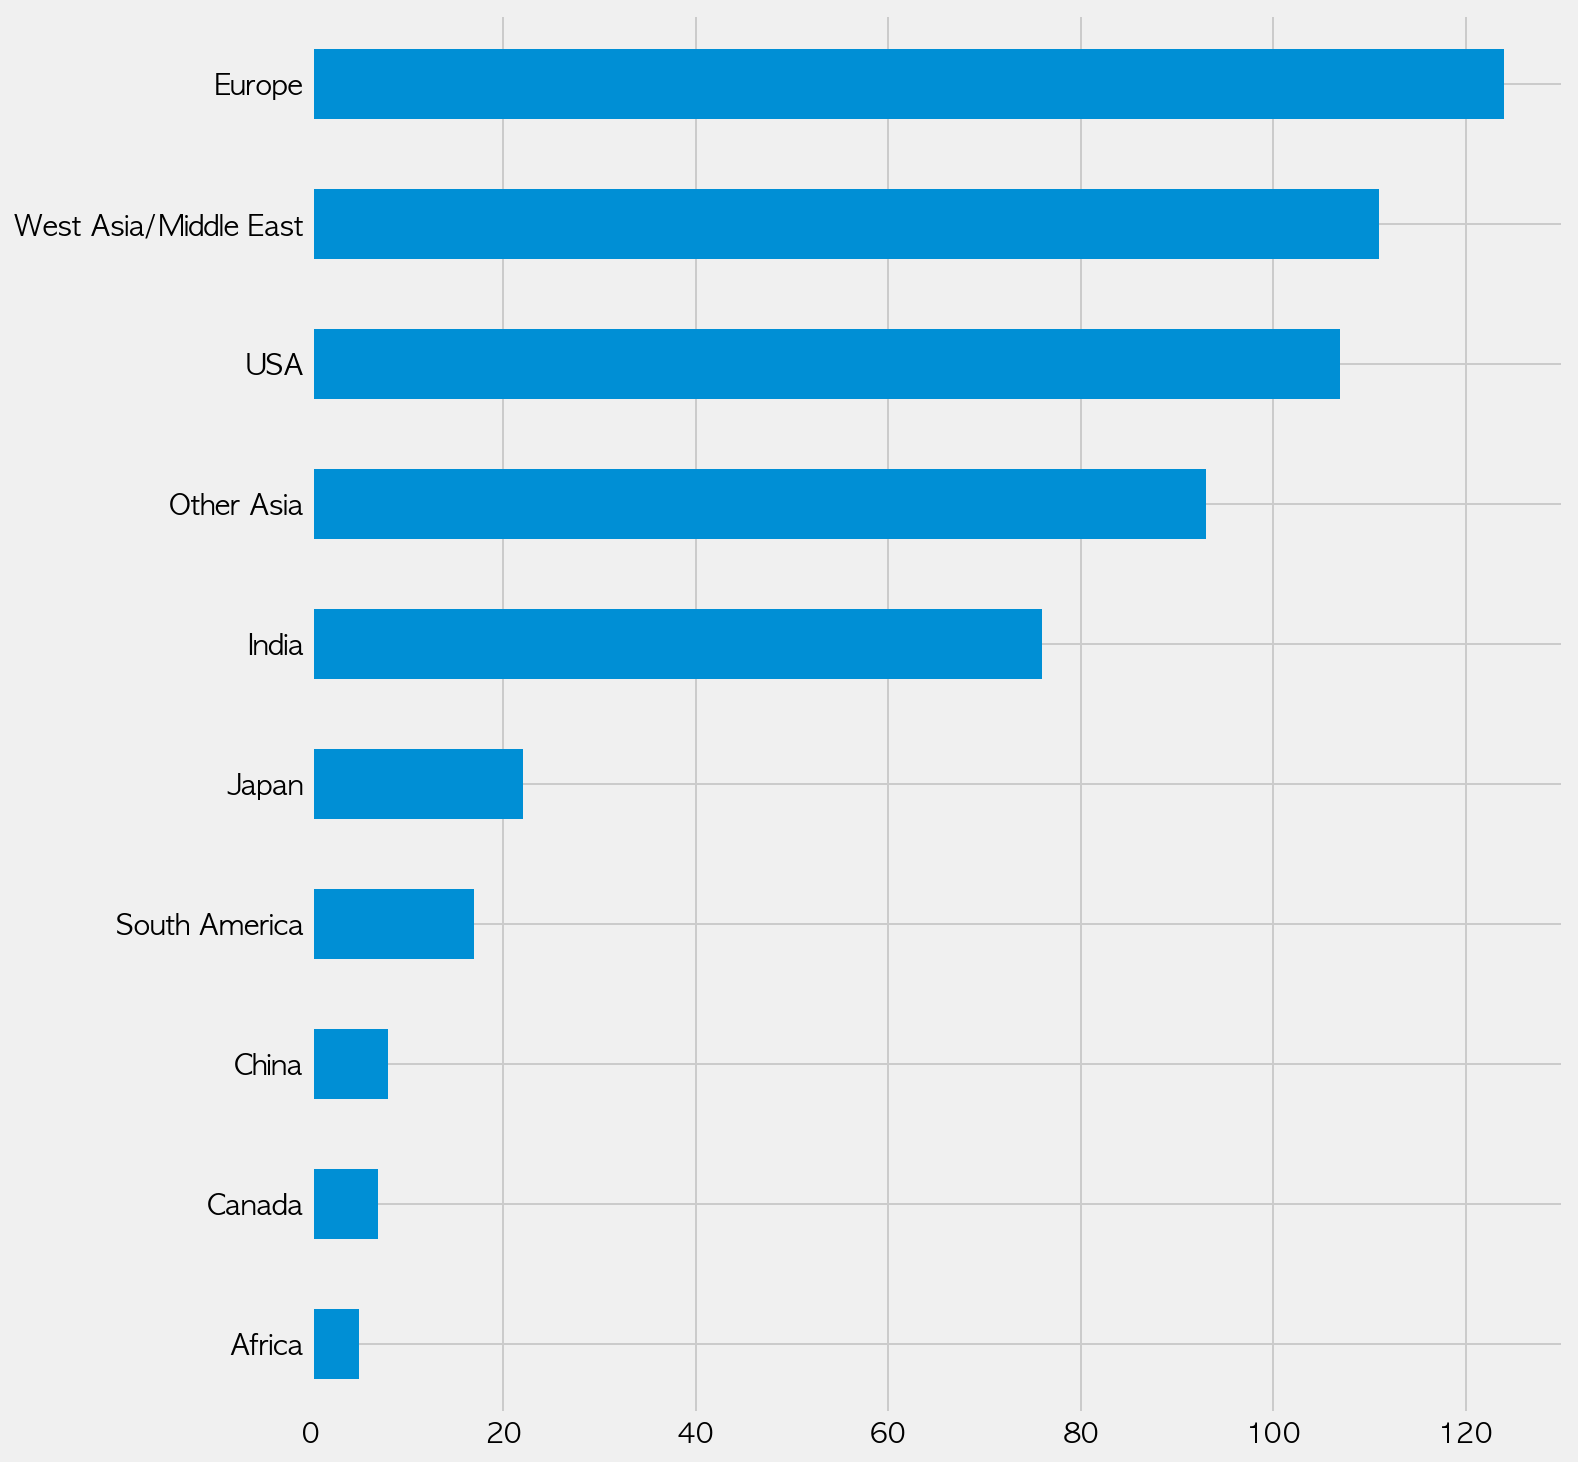

In [1454]:
oversea_count.sort_values().plot.barh(figsize=(10,12))

### Comparison of Total Number of Cases and Overseas Infection

<AxesSubplot:>

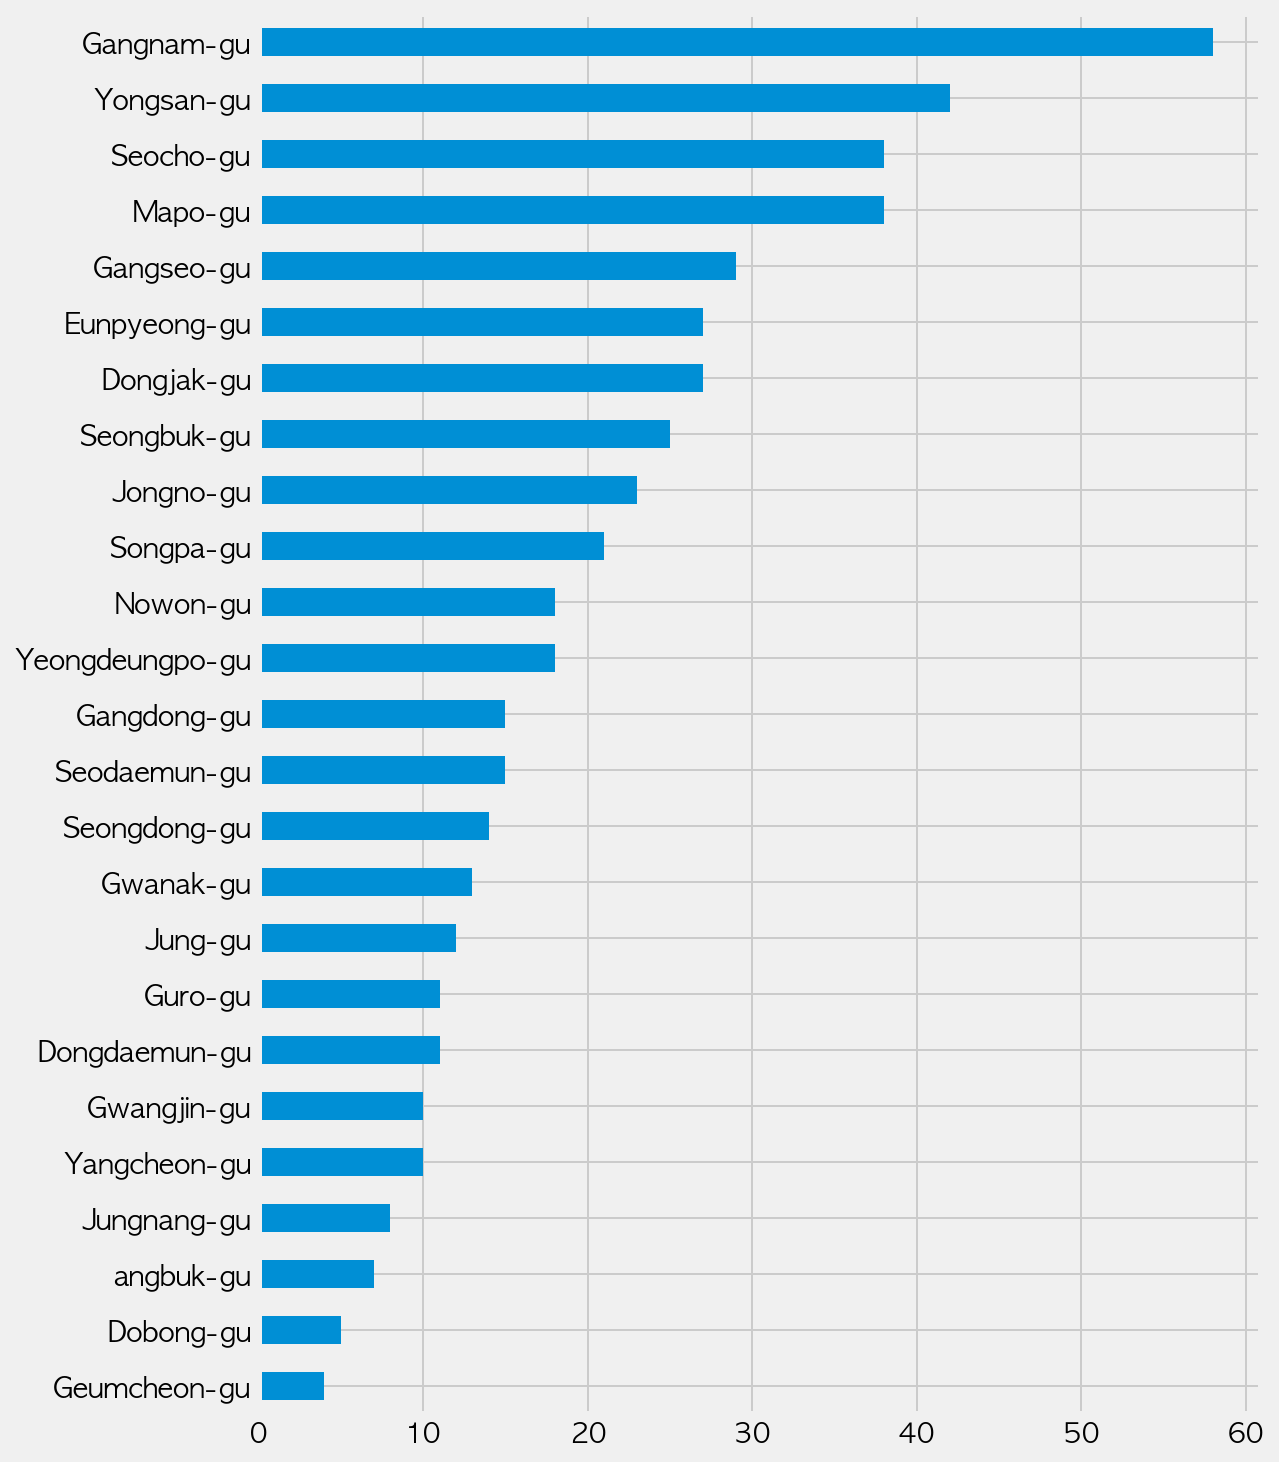

In [1486]:
# Patients who are not resident in Seoul ('Another City') are excluded
seoul_residence = df_overseas[~df_overseas["Area"].str.contains("Another City")]
overseas_count_gu = seoul_residence["Area"].value_counts()
overseas_count_gu.sort_values().plot.barh(figsize=(8,12))

In [1490]:
# total number of infection in each area
df_seoul_residence = df[~df["Area"].str.contains("Another City")]
all_gu_count = df_seoul_residence["Area"].value_counts()
all_gu_count

Gangnam-gu         3677
Songpa-gu          2669
Gwanak-gu          2542
Seocho-gu          2162
Dongjak-gu         1898
Yeongdeungpo-gu    1821
Gangdong-gu        1732
Nowon-gu           1732
Eunpyeong-gu       1684
Mapo-gu            1652
Gangseo-gu         1561
Seongbuk-gu        1519
Jungnang-gu        1516
Gwangjin-gu        1492
Guro-gu            1413
Yongsan-gu         1330
Seongdong-gu       1308
Dongdaemun-gu      1302
Yangcheon-gu       1258
angbuk-gu          1157
Seodaemun-gu       1144
Dobong-gu          1039
Geumcheon-gu        860
Jung-gu             614
Jongno-gu           566
Name: Area, dtype: int64

### Merge

In [1501]:
# Method 1
pd.DataFrame({"Overseas" : overseas_count_gu,
              "Total Infection" : all_gu_count}).head()

,Overseas,Total Infection
Dobong-gu,5,1039
Dongdaemun-gu,11,1302
Dongjak-gu,27,1898
Eunpyeong-gu,27,1684
Gangdong-gu,15,1732


In [1507]:
# Method 2
df_all_gu = all_gu_count.to_frame()
df_all_gu.columns = ["Total Infection"]
df_overseas_gu = overseas_count_gu.to_frame()
df_overseas_gu.columns = ["Overseas"]

df_comparison = df_all_gu.merge(df_overseas_gu, left_index=True, right_index=True)
df_comparison.head()

,Total Infection,Overseas
Gangnam-gu,3677,58
Songpa-gu,2669,21
Gwanak-gu,2542,13
Seocho-gu,2162,38
Dongjak-gu,1898,27


<AxesSubplot:>

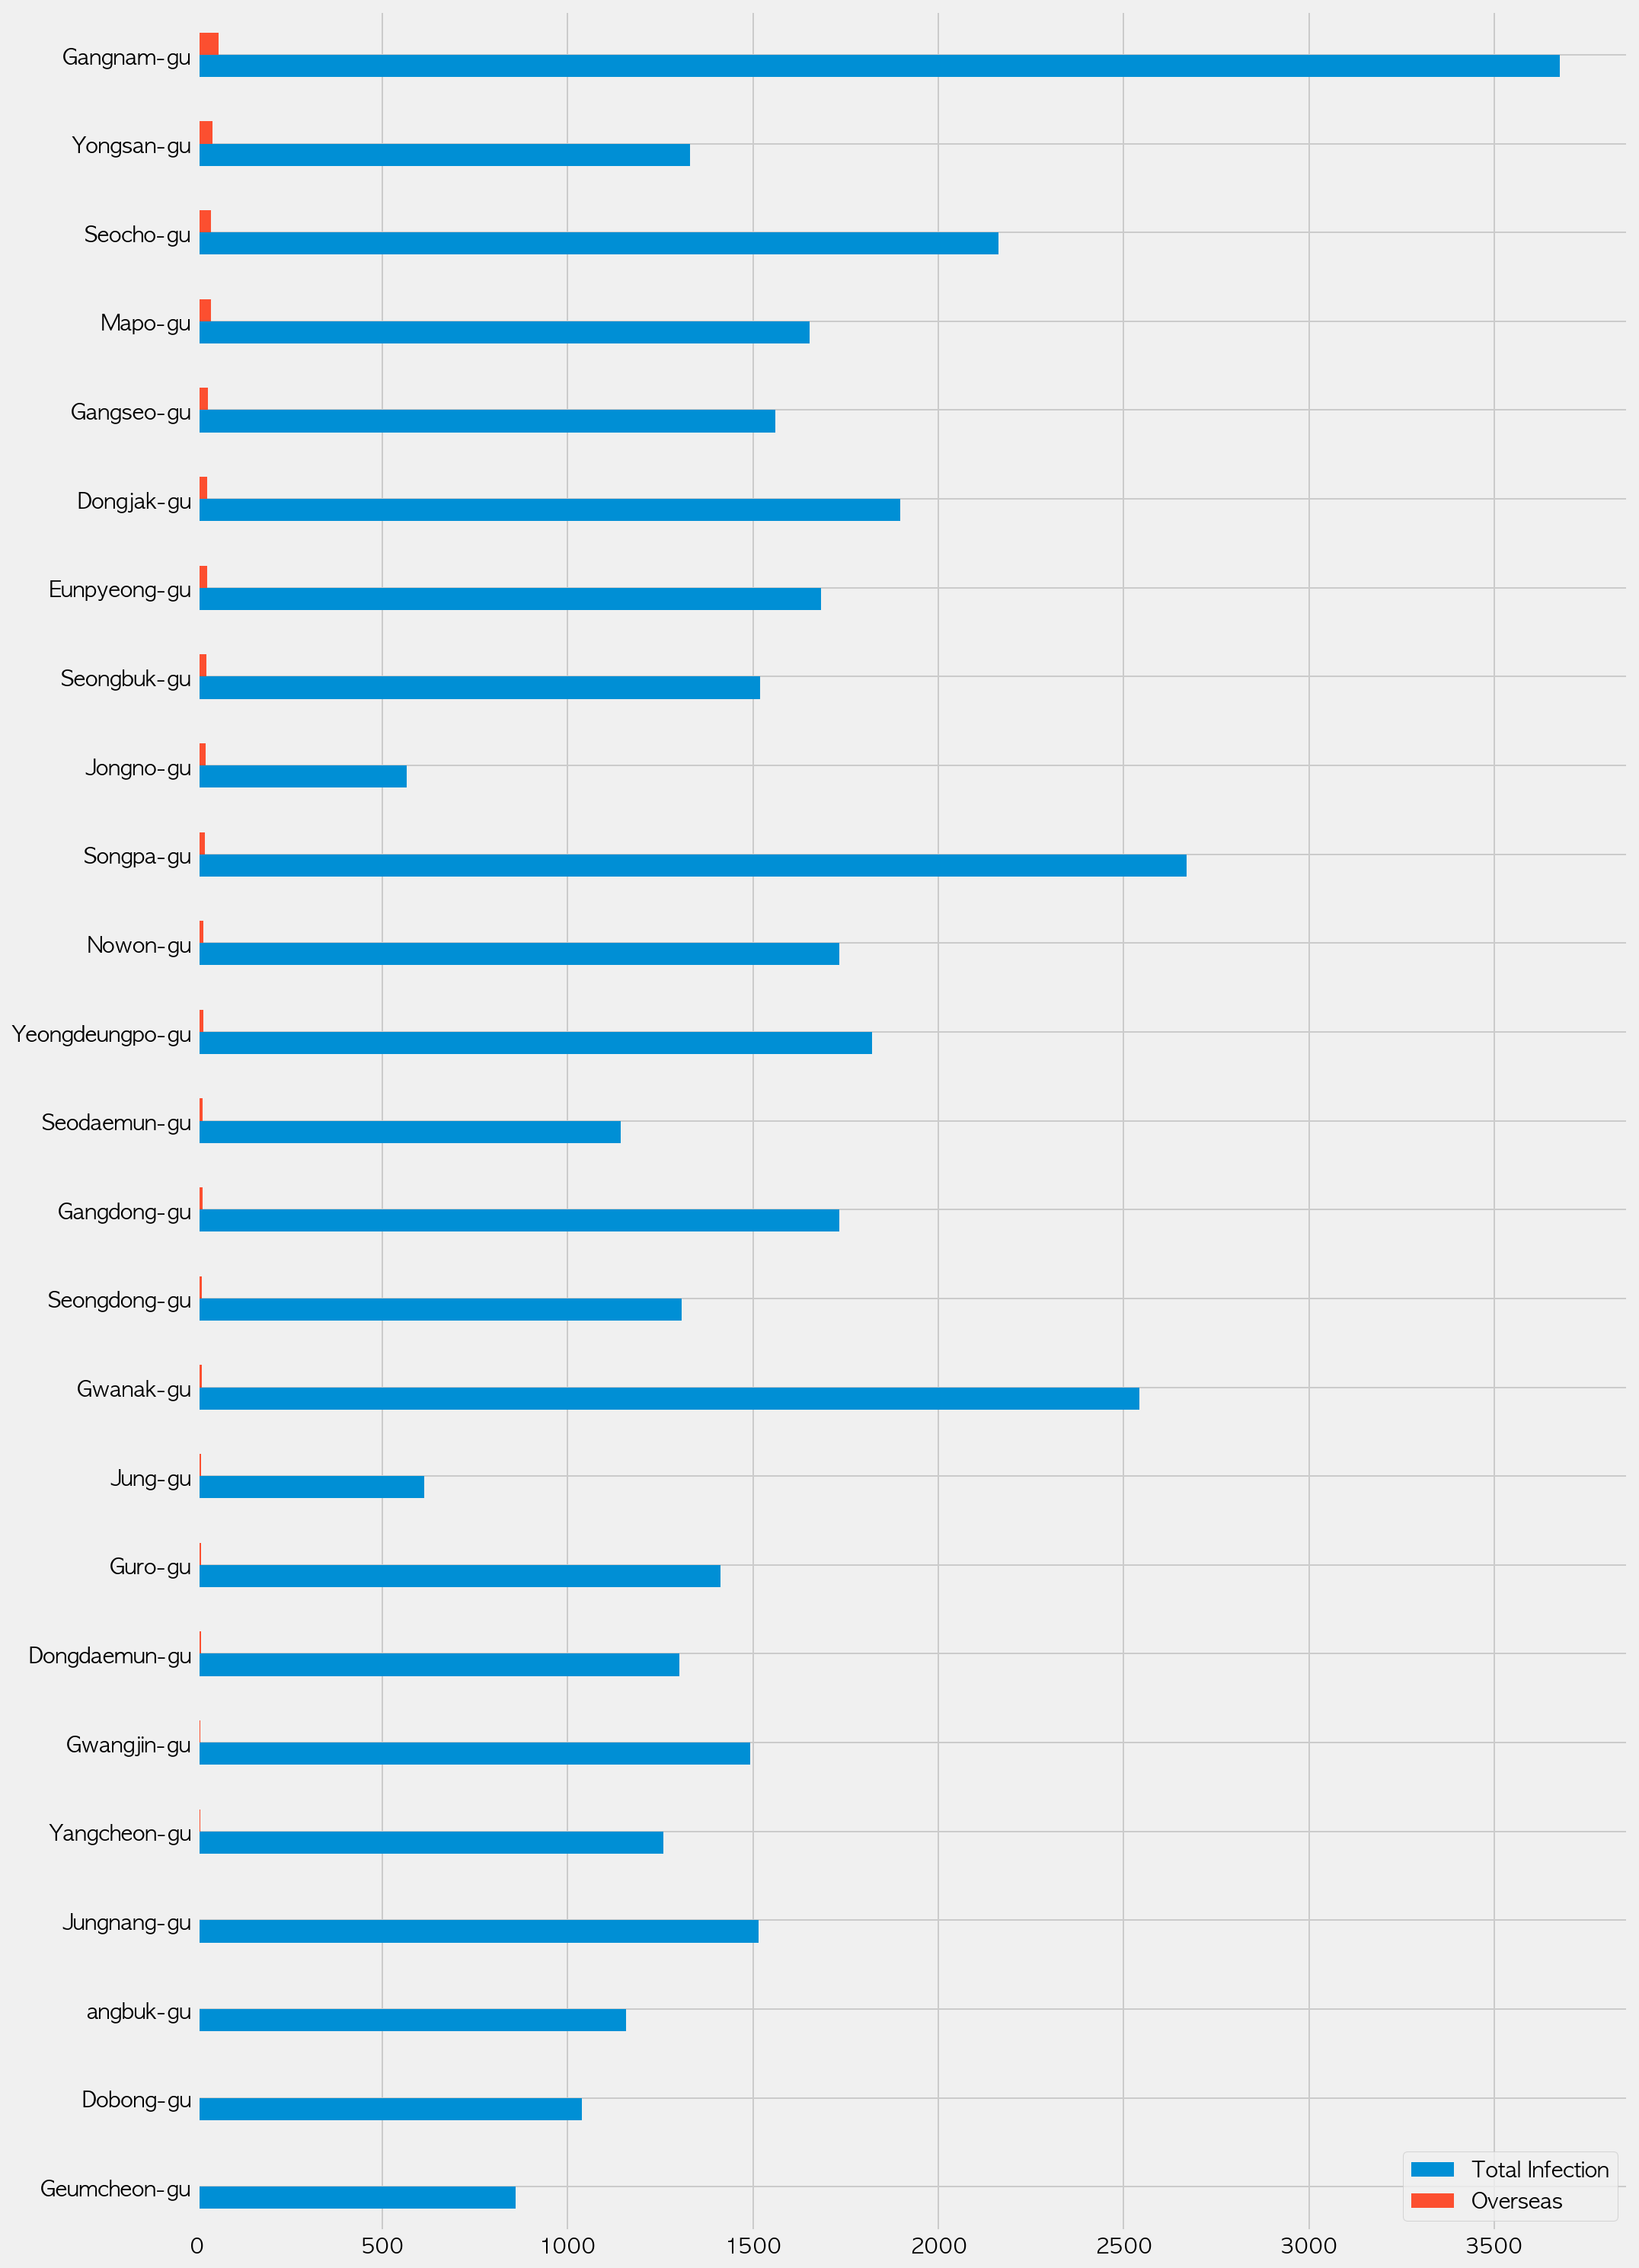

In [1508]:
df_comparison.sort_values(by="Overseas").plot.barh(figsize=(15,25))

In [1514]:
# proportion of overseas infection in each area
df_comparison["Proportion"] = df_comparison["Overseas"] / df_comparison["Total Infection"] * 100
df_comparison.sort_values(by="Proportion", ascending=False)

,Total Infection,Overseas,Proportion
Jongno-gu,566,23,4.063604
Yongsan-gu,1330,42,3.157895
Mapo-gu,1652,38,2.300242
Jung-gu,614,12,1.954397
Gangseo-gu,1561,29,1.857783
Seocho-gu,2162,38,1.757632
Seongbuk-gu,1519,25,1.645820
Eunpyeong-gu,1684,27,1.603325
Gangnam-gu,3677,58,1.577373
Dongjak-gu,1898,27,1.422550


<AxesSubplot:>

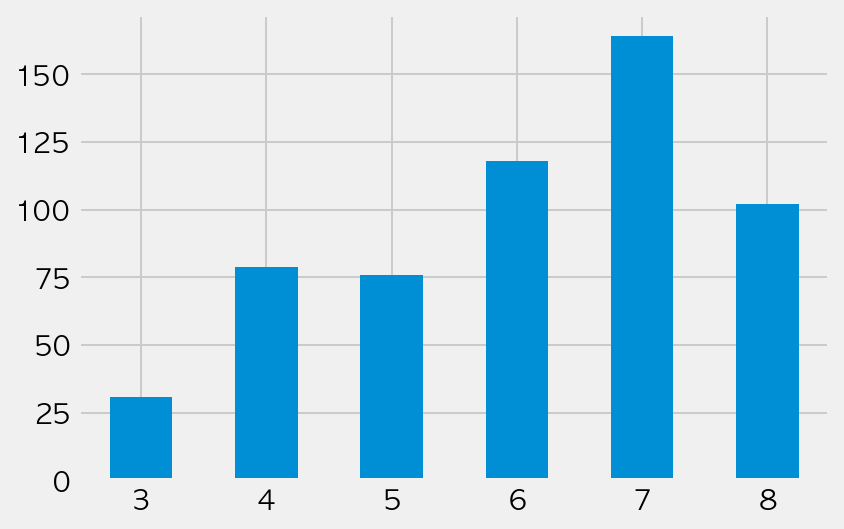

In [1524]:
# monthly trend of overseas infection
overseas_monthly_case = df_overseas["Month"].value_counts()
overseas_monthly_case.sort_index().plot.bar(rot=0)

## 'groupby' vs 'crosstab' vs 'pivot' vs 'pivot_table'

In [1562]:
# 'groupby'
month_gu = seoul_residence.groupby(["Month","Area"])["Number"].count().unstack()
month_gu = month_gu.fillna(0).astype(int)
month_gu.style.background_gradient(cmap="Greens")

Area,Dobong-gu,Dongdaemun-gu,Dongjak-gu,Eunpyeong-gu,Gangdong-gu,Gangnam-gu,Gangseo-gu,Geumcheon-gu,Guro-gu,Gwanak-gu,Gwangjin-gu,Jongno-gu,Jung-gu,Jungnang-gu,Mapo-gu,Nowon-gu,Seocho-gu,Seodaemun-gu,Seongbuk-gu,Seongdong-gu,Songpa-gu,Yangcheon-gu,Yeongdeungpo-gu,Yongsan-gu,angbuk-gu
Month,,,,,,,,,,,,,,,,,,,,,,,,,
3,0,1,5,0,0,1,1,1,0,0,1,1,0,0,5,0,1,0,1,1,0,0,1,5,0
4,0,1,7,0,2,6,5,0,4,2,1,1,1,0,3,4,1,0,4,2,3,0,1,6,2
5,0,1,0,13,6,3,4,1,0,1,0,0,1,1,3,5,12,3,6,1,5,1,2,2,1
6,1,2,5,4,3,13,6,1,1,4,2,4,1,3,9,3,9,2,3,3,3,6,5,11,2
7,2,2,6,9,3,18,9,0,6,5,4,10,5,3,8,2,9,2,7,5,8,3,3,12,1
8,2,4,4,1,1,17,4,1,0,1,2,7,4,1,10,4,6,8,4,2,2,0,6,6,1


In [1563]:
# 'crosstab'
month_gu = pd.crosstab(seoul_residence["Month"], seoul_residence["Area"])
month_gu.style.bar()

Area,Dobong-gu,Dongdaemun-gu,Dongjak-gu,Eunpyeong-gu,Gangdong-gu,Gangnam-gu,Gangseo-gu,Geumcheon-gu,Guro-gu,Gwanak-gu,Gwangjin-gu,Jongno-gu,Jung-gu,Jungnang-gu,Mapo-gu,Nowon-gu,Seocho-gu,Seodaemun-gu,Seongbuk-gu,Seongdong-gu,Songpa-gu,Yangcheon-gu,Yeongdeungpo-gu,Yongsan-gu,angbuk-gu
Month,,,,,,,,,,,,,,,,,,,,,,,,,
3,0,1,5,0,0,1,1,1,0,0,1,1,0,0,5,0,1,0,1,1,0,0,1,5,0
4,0,1,7,0,2,6,5,0,4,2,1,1,1,0,3,4,1,0,4,2,3,0,1,6,2
5,0,1,0,13,6,3,4,1,0,1,0,0,1,1,3,5,12,3,6,1,5,1,2,2,1
6,1,2,5,4,3,13,6,1,1,4,2,4,1,3,9,3,9,2,3,3,3,6,5,11,2
7,2,2,6,9,3,18,9,0,6,5,4,10,5,3,8,2,9,2,7,5,8,3,3,12,1
8,2,4,4,1,1,17,4,1,0,1,2,7,4,1,10,4,6,8,4,2,2,0,6,6,1


In [1564]:
# 'pivot_table'
month_gu = pd.pivot_table(seoul_residence, index="Month", columns="Area", values="Number", aggfunc="count", fill_value=0)
month_gu

Area,Dobong-gu,Dongdaemun-gu,Dongjak-gu,Eunpyeong-gu,Gangdong-gu,Gangnam-gu,Gangseo-gu,Geumcheon-gu,Guro-gu,Gwanak-gu,...,Nowon-gu,Seocho-gu,Seodaemun-gu,Seongbuk-gu,Seongdong-gu,Songpa-gu,Yangcheon-gu,Yeongdeungpo-gu,Yongsan-gu,angbuk-gu
Month,,,,,,,,,,,,,,,,,,,,,
3,0,1,5,0,0,1,1,1,0,0,...,0,1,0,1,1,0,0,1,5,0
4,0,1,7,0,2,6,5,0,4,2,...,4,1,0,4,2,3,0,1,6,2
5,0,1,0,13,6,3,4,1,0,1,...,5,12,3,6,1,5,1,2,2,1
6,1,2,5,4,3,13,6,1,1,4,...,3,9,2,3,3,3,6,5,11,2
7,2,2,6,9,3,18,9,0,6,5,...,2,9,2,7,5,8,3,3,12,1
8,2,4,4,1,1,17,4,1,0,1,...,4,6,8,4,2,2,0,6,6,1


In [1565]:
top_5_gu = seoul_residence["Area"].value_counts().head(5).index

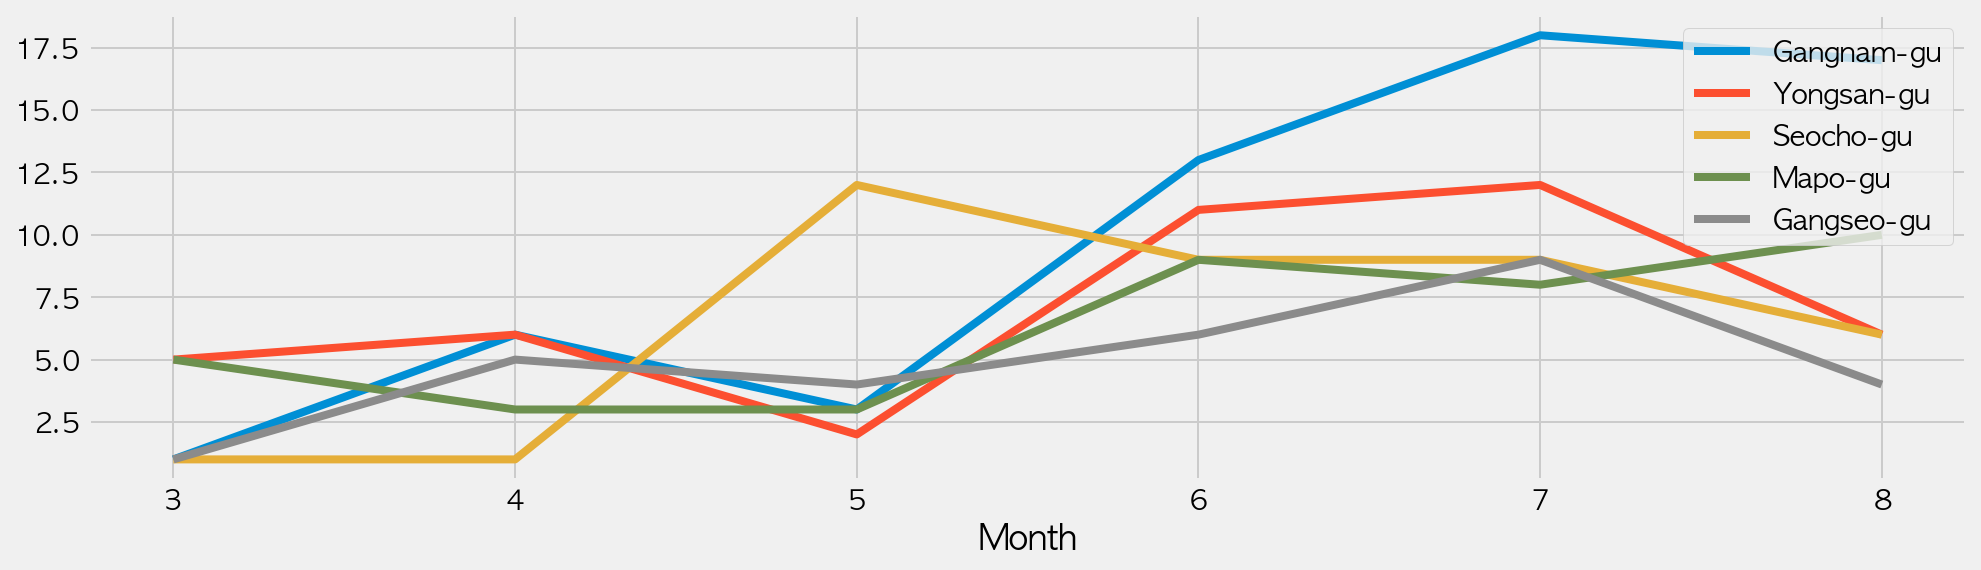

In [1566]:
mg = month_gu[top_5_gu].plot(figsize=(15,4))
mg.legend(loc=1)

## Trends in Seoul Districts and Overseas Inflow

In [1573]:
# 
gu_international = seoul_residence.groupby(["Overseas","Area"])["Number"].count().unstack()
gu_international.fillna(0).astype(int).style.background_gradient()

Area,Dobong-gu,Dongdaemun-gu,Dongjak-gu,Eunpyeong-gu,Gangdong-gu,Gangnam-gu,Gangseo-gu,Geumcheon-gu,Guro-gu,Gwanak-gu,Gwangjin-gu,Jongno-gu,Jung-gu,Jungnang-gu,Mapo-gu,Nowon-gu,Seocho-gu,Seodaemun-gu,Seongbuk-gu,Seongdong-gu,Songpa-gu,Yangcheon-gu,Yeongdeungpo-gu,Yongsan-gu,angbuk-gu
Overseas,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0
Canada,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,0
China,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,2,0,0,0,0,2,0,0
Europe,1,2,9,2,2,14,9,2,3,1,3,5,4,0,9,6,9,3,4,2,2,5,5,10,1
India,0,1,0,7,2,10,4,1,0,4,1,6,3,0,4,1,3,2,1,2,4,2,0,5,0
Japan,0,0,1,0,1,3,0,0,1,0,0,2,1,0,3,3,2,2,3,0,0,0,0,0,0
Other Asia,1,5,2,1,4,6,5,1,0,2,2,7,1,6,3,3,7,0,6,0,4,1,0,6,3
South America,0,0,1,1,0,1,1,0,0,0,0,0,0,0,6,1,0,0,0,2,0,0,0,2,0
USA,0,0,8,8,3,15,5,0,3,3,0,3,0,0,5,2,10,4,4,5,4,1,6,3,0


In [1576]:
gu_international.loc[["USA"],["Gangnam-gu","Seocho-gu","Songpa-gu"]].astype(int)

Area,Gangnam-gu,Seocho-gu,Songpa-gu
Overseas,,,
USA,15,10,4


In [1579]:
gu_international[top_5_gu].dropna(how="all").fillna(0).astype(int)

Area,Gangnam-gu,Yongsan-gu,Seocho-gu,Mapo-gu,Gangseo-gu
Overseas,,,,,
Africa,0,2,1,0,0
Canada,1,0,2,1,1
China,0,0,0,0,1
Europe,14,10,9,9,9
India,10,5,3,4,4
Japan,3,0,2,3,0
Other Asia,6,6,7,3,5
South America,1,2,0,6,1
USA,15,3,10,5,5
